## Customer Profiling 

For Profiling customers, we are focussing on specific customers:

1) Frequency Analysis: Analysing the average time elapsed between two orders for each customer. This is done for customers having 5-100 orders. This helps us with sending out customised reorder emails timed diffferently for each customer

2) Spend Pattern: Calculating the average spend of each customer

3) Spend vs Frequency- Quadrant Analysis: Identiftying customer behavior, and improving the same to maximixe profits

4) Frequency- By Hour of the Day: Identifying Lean Hours and matching Demand with Supply by incentivising Insta-partners and providing lean Hour offers to boost sales

In [1]:
import os
import pandas as pd
import numpy as np
# Please specify your directory path below and keep all relevent files within the folder
# order_products_prior is a large file- takes time (approx 30 sec) to import
os.chdir("C:\Users\User\Desktop\Project-Computation and Communication")
# below dataset contains info of products brought in each order. This is the most granular dataset
order_products_prior = pd.read_csv("order_products__prior.csv")
aisles = pd.read_csv("aisles.csv")
# Orders dataset is contains information on the orders of regular customers who have placed between 4-100 orders
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [2]:
orders1=orders.drop(['eval_set', 'order_number','order_dow','order_hour_of_day','days_since_prior_order'],axis=1)
orders_grouped=orders1.groupby('user_id').count()
orders_grouped=orders_grouped.reset_index()
orders_grouped1=orders_grouped.rename(index=str, columns={"order_id": "order_count"})
# this is the final orders grouped dataset
orders_grouped2=orders_grouped1.sort_values(['order_count','user_id'], ascending=[True,True])

freq_dist=orders_grouped2.groupby('order_count').count()
freq_dist=freq_dist.reset_index()
freq_dist1=freq_dist.sort_values(['order_count'], ascending=[True])
freq_dist2=freq_dist1.rename(index=str,columns={'user_id':'customer_count'})
# this is the final frequency distribution table- keep it aside

In [3]:
orders2=orders.drop(['eval_set', 'order_number','order_dow','order_hour_of_day'],axis=1)
orderswithcount=pd.merge(orders_grouped2, orders2, how='inner', on='user_id', sort=True)
# removing nulls
orderswithcount=orderswithcount.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [4]:
orderswithcount1=orderswithcount.groupby('user_id').mean()
orderswithcount1=orderswithcount1.reset_index()
orderswithcount2=orderswithcount1.drop('order_id',axis=1)
orderswithcount3=orderswithcount2.rename(index=str,columns={'days_since_prior_order':'avg_order_gap'})

### 1. Frequency Analysis

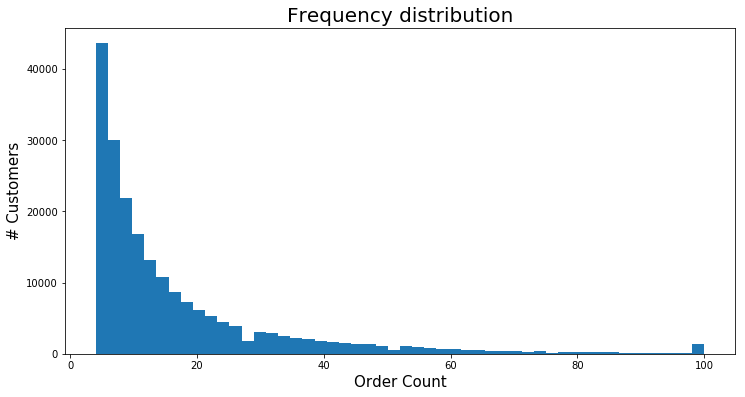

In [5]:
# Visualization 1
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax=plt.subplots(figsize=(12,6))
ax.hist('order_count',data=orderswithcount3,bins=50)
ax.set_title("Frequency distribution",fontsize = 20)
ax.set_ylabel("# Customers",fontsize = 15)
ax.set_xlabel("Order Count",fontsize = 15)
plt.show()

### Results
- This prelim result confirms the hypothesis that there are lesser people as the order count increases

#### 1.1 How Frequently do customers reorder?
Analysing the average time elapsed between two orders for each customer. This is done for customers having 5-100 orders. This helps us with sending out customised reorder emails timed diffferently for each customer

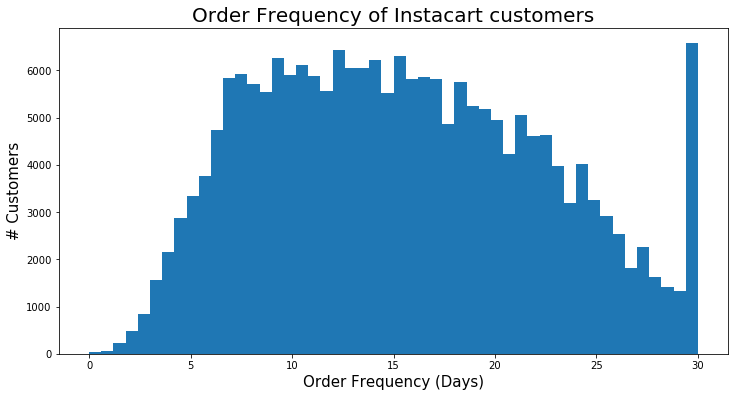

In [6]:
# Visualization 2
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax=plt.subplots(figsize=(12,6))
ax.hist('avg_order_gap',data=orderswithcount3,bins=50)
ax.set_title("Order Frequency of Instacart customers",fontsize = 20)
ax.set_xlabel("Order Frequency (Days)",fontsize = 15)
ax.set_ylabel("# Customers",fontsize = 15)

### Results
- Order frequency shows that even regular customers have a large variation. 25% of the people are above the 20 day mark. We would like to drill down and analyse their spends 

### 2. Spend Pattern
Calculating the average spend of each customer

In [7]:
## departments = pd.read_csv("departments1.csv")# creating a master dataset
# master_products=pd.merge(products, departments, how='inner', on='department_id', sort=True)
# master_products=pd.merge(master_products, aisles, how='inner', on='aisle_id', sort=True)
master_products = pd.read_csv("master_products.csv")# creating a master dataset

In [8]:
# import random
# def randomnum(row):
#     a = np.random.choice(range(row["min"],row["max"]))
#     return a
# master_products["Price"] = master_products.apply(randomnum, axis = 1)

In [9]:
order_products_prior1=order_products_prior.drop(['reordered','add_to_cart_order'],axis=1)
order_products_merged=pd.merge(order_products_prior1,master_products,on='product_id')

In [10]:
# This part may give error on certain systems(depending on the config). If it does, please restart your system and try running it again
order_products_user=pd.merge(order_products_merged,orders1,how='left',on='order_id')

In [11]:
order_products_user1=order_products_user.groupby('user_id').mean().reset_index()

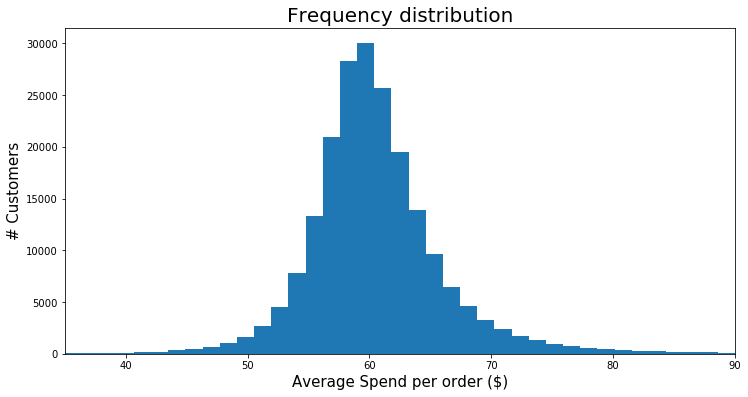

In [12]:
# This is the final file which has average user spend
user_spend=order_products_user1.drop(['order_id', 'product_id','aisle_id','department_id','min', 'max'],axis=1)

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax=plt.subplots(figsize=(12,6))
ax.hist('Price',data=user_spend,bins=100)
ax.set_title("Frequency distribution",fontsize = 20)
ax.set_xlabel("Average Spend per order ($)",fontsize = 15)
ax.set_xlim([35, 90])
ax.set_ylabel("# Customers",fontsize = 15)

### Results
- As expected, the average of Customer spend comes out to be normal distribution. This is because the price information was randomly generated. 
- For drilling down, we should look at a combination of Frequency Analysis and the Spend Analysis

### 3. Spend vs Frequency- Quadrant Analysis
Identiftying customer behavior, and improving the same to maximize profits

In [13]:
spend_usercount=user_spend.groupby('Price').count().reset_index()
spend_usercount=user_spend.groupby('Price' , as_index = False).count()
spend_freq=pd.merge(user_spend,orderswithcount3,on='user_id')

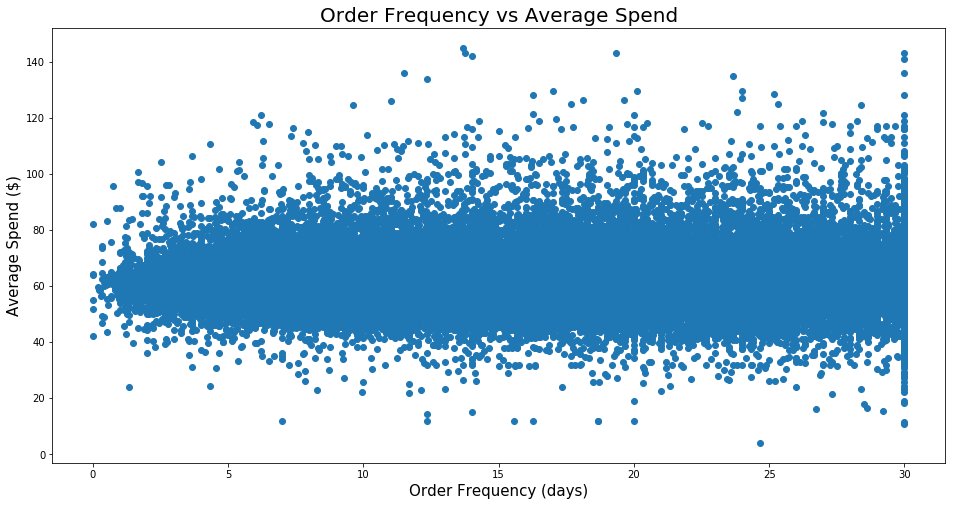

In [14]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(16,8))
plt.scatter('avg_order_gap','Price',data=spend_freq)
plt.title('Order Frequency vs Average Spend',fontsize=20)
plt.ylabel('Average Spend ($)',fontsize=15)
plt.xlabel('Order Frequency (days)',fontsize=15)
plt.show()

### Results
- Spend vs Price analysis clearly shows that customers have similar spending habits throughout the spectrum. 
- This means we should focus on reducing reording time to improve our revenues. 

### 4. Frequency- By Hour of the Day
Identifying Lean Hours and matching Demand with Supply by incentivising Insta-partners and providing lean Hour offers to boost sales

In [15]:
# x=[]
# i=0
# while i<24:
#     x.append(i)
#     i+=1
# import matplotlib.pyplot as plt
# %matplotlib inline
# fig, ax=plt.subplots(figsize=(12,6))
# ax.hist('order_hour_of_day',data=orders,bins=24,ec='black')
# ax.set_title("Frequency of orders by Hour of Day",fontsize = 20)
# plt.xticks(x,fontsize=12)
# ax.set_xlabel("Hour of Day",fontsize = 15)
# ax.set_ylabel("# Orders",fontsize = 15)
# plt.show()

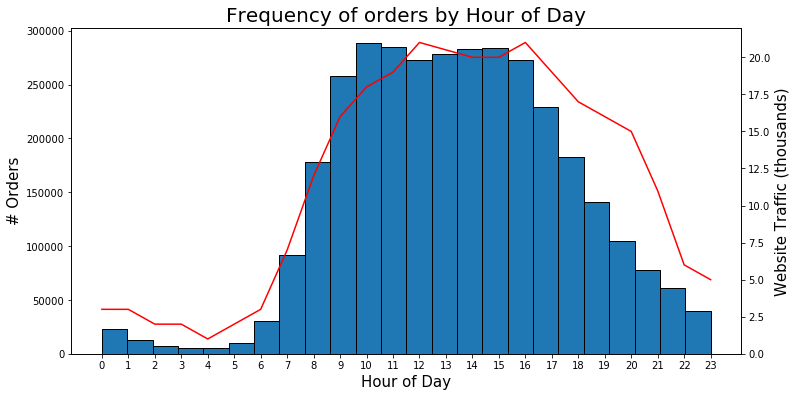

In [16]:
x=[]
i=0
while i<24:
    x.append(i)
    i+=1
y = [3,3,2,2,1,2,3,7,12,16,18,19,21,20.5,20,20,21,19,17,16,15,11,6,5]
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax=plt.subplots(figsize=(12,6))
ax.hist('order_hour_of_day',data=orders,bins=24,ec='black')
ax2 = ax.twinx()
ax2.plot(y, color="red")
ax.set_title("Frequency of orders by Hour of Day",fontsize = 20)
plt.xticks(x,fontsize=12)
ax.set_xlabel("Hour of Day",fontsize = 15)
ax.set_ylabel("# Orders",fontsize = 15)
ax2.set_ylabel(r"Website Traffic (thousands)",fontsize = 15)
ax.grid(Fdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAxwAAAGNCAYAAACbonfHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xm8TfX+x/HXh2NKMkQyE2m8TUqzoYmkQWkeFHKbu6l+3eZSSpPmSXFDgwaRCkVoUESlSXVJCpFCCRkOn98f33Wu3bb3Ofsc55x1zvF+Ph7rsff+rrW+67OHw/7s72TujoiIiIiISFEoF3cAIiIiIiJSdinhEBERERGRIqOEQ0REREREiowSDhERERERKTJKOEREREREpMgo4RARERERkSKjhENEJEZm1trM3jGz38zMzWx63DElMrOeUVxnxR1LXkpTrGWdmVU0s9vMbLaZrYnel85xxyUi8ciKOwAR2cjM8loY5zx3f6Y4YpGiZ2Y1gDeBCsBQYAnwc6xBSYGY2RHAOOAddz8izTEtgFnA9+7eojjji8H/ATcAk4BhQDbw39xOMLNngTMTijYAfwK/AV8C44EX3H1pEcQrIkVICYdIyXRrmvIZxRqFFLUDgNrANe5+d9zBiBSizsAfwFHuvi6f544AvojuVwMaAYcCJwB9zexSdx9aaJGKSJFTwiFSArn7LXHHIMWifnSrVg0pa+oDvxUg2QB41d2fTSwwsyzgfOB+YLCZrXb3lwshThEpBhrDIVJKmdmzUb/oxmZ2uZl9aWZ/mdn4pOOONrMxZrYk6kv9vZndbWbbpKm3g5lNNrOVZrbUzEaYWcuE6zVMOPaIqOyGNHXNN7PZafadaWaTzOx3M1ttZjPN7Dozq5h0XFZ0jfFmVsfMnjazRdFz+crMzsnlNepoZm+Y2eLo+HlmNtLMDov2HxPV/VSa8ytHr8EvyXHlcs2jzOwtM1sWPa/vzOyOxNfbzFpE3ecGRkVDozgyGn9gZuXM7CIzmx69TyvN7GMz+6eZWS6vX30zG2RmP5vZ+sRrmdmOZvZKFPeK6DNwdB5xNDKzx8xsTvT6LjGz18ysVYpjb4/iOMTMzo7iXZH4+TCzE8xsQsL7uyD6jFyQ12uS4nrHmdlHCZ/jl8ysedIxL0cxHZymjlOj/Q/k9/oFiDc/72mLKK6n09T1gZllJ5X972/VzA4ws9HR6/K3v+lc4qthZneZ2azoc73UzMbm/C0lHPds9NluBDRP+Fyn/HcgU+6e7e6PA5cCBtxvZpWS4vs/M5sYfW7WRn/3I81s/6QYt42eQ9ouXhb+zXQz22tz4haRQC0cIqXfo8AhwGjCeIC1OTvMrA9wI2FswOvAr8CewNVARzM7yN1XJBx/KvA8sAZ4EVgEtAE+AmYWVsBmNhg4B/gJeIXQ9eIgoC9wmJl1cPf1SafViuJYBbwEVAFOIfzaud7dn0u6Rl/gOkIf8JHAfMKvrgcDZwATgDHAXOA0M+vt7n8mXfMUoCZwl7uvJQ9mdjHwMLACeJnwercHrgWONbND3P0PYCmh29w+wLH8vQvJF8n1Jl3DgBei2H4EcpKlLsAT0fNLlYTVBqYQXuvhgAOLozp3BiYTXuM3oxh2JHxmRqeJY1/gLcLrMzaqs04UR0czO9bd305x6jXAEVHdE4Cto/ouInyWFwKjCP32tyN8XrtFzy1TpwBHRzFNBPYGTgbaR5/5WdFxjwNdgV7R80/2z+j2yXxcO9824z0tiEOAm4D3CAnvdkCurRBmVovw+uwMfMzG9/oUYLyZ9XL3nOTnVWA20JswbuOhqLywxl0MiuJvCLQjfAYBdgduB94lfLZ+B5oAxwGdzKyTu48HcPclZvYScLaZtXf3iUnPtylwFDDV3dWNVaQwuLs2bdpKyEb4EujALSm2c5OOfTY6dh7QJEVdR0b73weqJ+3rGe27J6FsG2AZIWHZO+n4hxNia5hQfkRUdkOa5zMfmJ3m2i8BlZP23RbtuzihLCvh2k8C5RP2/QNYD3yRVE+n6PjZQP2kfQY0SHj87+jYC1LE/wFh4GrzDN67HaLX7negZdK+AdE1HkvzWpyVj8/I2dE504CqCeVbA59G+05J8/r9J/H1SzhmQvLrHpWflHDuWQnlFYA5wF/AIUnnNCQkDfOBignlt0f1rAD2TBHD51F9tVPs26QszWvTMyHejkn7rozK30oq/ya6bs2k8h2j9/7dDK+d87cwh9R/v7cQvnw7m/5N5Pc9bRGVPZ0mlg+A7DTxOdAj089bdO7ANJ/fnQkJ/WqgUdK+Tf72M7hOzr9puf49EJIzB25MKKsBbJvi2CaEH06+TCo/IKpjWIpzcj6r5+Unfm3atKXfYg9AmzZtG7eELwSptklJx+b853xxmrpej/bvlGb/l8DPCY+7RccPTHFsTWA5hZNwfEloQdkmxfFZhKTnw6Qyj77YbJ3inMmEL4ZVEsrGROccm8FrXieK57Ok8t2iOt7O8L27OTq+T4p92xK+aK8AKiSUFyThmBidc1iKfR2SY054/f7K5QuZE2ZPKpdi/wfJMbIxEbkzTYw5X+6PSijL+RJ3T5pzPo8+Y9VT7c/wtcl5Pd9KsS8L+CHan5hwXh6VXZ50/D1R+RkZXjvxC31eW/LfRH7f081JOKbl8zWtFH12/gBqpNh/Z1TvdUnlRZlw3Bsd91CG9T4WHZ/848OnhL/9Okmfk58J/w5tVdDPojZt2v6+qUuVSAnk7pb3Uf/zcZryAwn/mZ6e1AU8RxZQz8yqe+jms09U/m6KeJaZ2ReErh0FZmbVCF0ffgF6p4lrNbBLivLvPKH7V4J5hO5YNQhfjCD8ermBjd0t0nL3X83sFeAMM2vt7jmvZ6/oNtOuPDmv34QU11hiZp9HcbYEvs6wznTXWU/oEpNsEuGL1d4p9s1x9yVp6gN43903pKkz+X0/MLptZma3pDhnp+h2FyC5W1W6z+tzwF3ATDN7kfA5nOzuv6U5PjepPsPZZjYZaEp4fRZEu54B7iC83w9CWEOCkID/Rug+lB+ZTIubrKDvaUGke/3T2RWoTOhe9HuK/RMIrYSFFV8mcv7h8L8Vmh0KXEb4+98OSB531YC/T9DwOKH18TwgZ5a4Y4F6wMPuvqpwwxbZcinhECn9FqUpr0X4j/nmPM7fmvDrZfXo8S/5vE5+1Ipu6+YRV3aKslRfdhKPLZ9QVh341TMYdxF5jDCu45/Ax2ZWmdDNJWc8QSZyXr+FafbnlNfIsL5NRH39twEWufsmr5G7rzGzpWmuke79K8j7vm10e2ou4UI0PiOTONz9bjNbDFwI/Au4AnAzmwhc7e6f5nGtRHk9l5znjLv/YWbPAz3N7FB3f58wdqIOcK+7r8nHdfNtM9/Tgsjv33GRf64LIGd2t19zCszsZMJ6H38R1kOZA6wk/PBwGGFa3Up/r4bnCS1ZvczsHnd3Nv7QUKTjdkS2NJqlSqT08zTlywlfui2PLeeX3j+i27pp6ts+RVnOL+LpfryonvQ45xrT8oipQpr6MvUHUNsynFnK3ScTBkqfZmbV2ThYfFCqL4G5XBNSv04QfjVNPC7foi9EywnPrXzy/uj51kpzjXSfk4K87znnHJPH+9g3H3Hg7s+4+/7Rc+hMGHPSHnjLzLZNd14KeT2X5Nfn8ej2nwm3Tvj1u0gV8D3N6+8uty//aV//NIr8c50f0Wt0aPRwasKu2wito63cvYu7X+nuN3mYYjxVqxLuvhIYAjQHDk8YLD7Z3TenFVJEkijhECm7pgB1zGynPI8Mcn5Bbpu8w8xqAnukOGdZdNsoxTk7k/QLd9Ql4zvgHxZW2S4qUwj/vnXIxzmPA1sBZxF+5dzAxtmCMvFZdNsueUc0y88ehBm2vstHnemuk0WYbShZO0KrVn5aA3KOPcTMUv2f0C5F2ZTo9tAU+zabu//u7m+6ew/CCuy1Sf1800n1Gc5iY9ewzxL3Ra0nU4GuZnYA4TlP9I2zWRW1/L6nuf3dVSeM8Sgs3xC6Zu5tqafSbh/d5ucztzl6ELpGzefvXdCaA1+5+9/+vqIEJbeuoInJZk/Cvxtq3RApZEo4RMqu/tHt02ZWL3mnmW2dND/9CMKvlGebWXJ/7D6EFX+TzSQMhO5iZrUT6t6KqD98mrgqAwOjL0fJcdVKcf38ejjnWmmee4MU5zxLGJh+LeELylh3/zEf1xxK6N51uZk1S9rXl5B8DfGCLYSWaFB028/MquQUmllVwlgE2Li+R56i5ziRMCvThYn7zOwkUn9ZG0GYTvgyM0uZ1JnZQVHXtIyYWXuzTdabMEJffAjJWqaOMrOOSWWXE8ZvjEto1Uv0OKHLzSuEL/j5mYZ3c+XrPXX3ZYQZ2Nok/qAQJVUPsmnXoQJz99WErkfVCf8O/I+Z7QhcQpid7dlNzy48FtaTuYCNM339K6m724/ATma2fcI5FsWc9kcXd/+GME7meMIPDUsJU1qLSCHSGA6RMsrd37awIN9twCwzG0OYpWdrwhevtoQvmp2j45dH/6E/D0yOBu7mrMOxC2Hmm0OSrrHGzB4mfEmfYWYjCFOmdiB8AdikL727D7CwMFwvoK2ZvU1Yj6MWYWrZQwktC5dsxnMfbWb9CINZvzWznHU4to+ew/uEXzMTz1lhZkOBi6KifP3K6e7fm9mVhC98M6J5/n8j/AK8PyE5u7agzynBUMLaAicBX0fPzQjjDpoAz7v7i/ms8yLgQ+ARC4v95azD0YUw29mxiQdH7/uJhPU3xkaDsWcQ+s83BvYDmhHGQazOMIbXgWVmNoWQzOR0ndmXMNB5Yj6ez+vA62Y2nNCXf2+gI2E9movTnPMicB/h1/NfCGu3FJeCvKf3ED6jH5nZy4Qv/e0JPyR+SRjsXViuJvzdXG5mrQmD8nPW4dgauNDdfyrE650YDbAHqEr4TLUh/P3+TpjWN3kw//3AI4S/veGE5P9QwiQNbxD9O5fGY4SWpDrA/VGSJSKFKe5psrRp07ZxI5o2M8Njc6aQbJjHcW0Iv9r+TPhS8iuhC8d9wD4pju9AmGp2FeHXvpGE/7RTXo/wBed6whe7tYTk4U7Cwnxpp8YkfMF6M4pnHSG5mUpIkHZKOC5nWtfx+X0dCF8y3oqexxrCjFbDgXZp6moV1TWPFOtVZPi+dCQMWv09uuYsoB8ppnulANPiRueVJyRkn0Tv0ypgOqGFolzSsbm+fgnHtYxem98Jg20/JCyelzZGwliJuwizbq0itHbNIvxCfCZ/XzMlZ1rcQ9Jc/6LoszYn4bP3KeHL7ibTIaep43+xRp+vKdFzWRbF1CKP83PWm0k53W8e5+ZMO5v2dWbjdLab/E3k5z1NOKcXIZFdE/39PEFI3HObFjflFNYZPL+ahCRndnS9ZdHf1hFpjt+caXFztvWEVtfvo8/GRSStl5J0fnfC9MqrCMn+q4TprfP67GVFnzcnzTTi2rRp27zN3PM7fkxEtkRm9izhS2Qjd58fdzxFwcx6ElpXbnH3W+OOR4qXmX1AmLq4ubv/EHc8UjyirmHfERZ5bJ/X8SKSfxrDISLC//q/X0FopSny2YmkZDGzgwjjVd5UsrHFuZrQhe2RuAMRKas0hkNEtmjRYmFtCHP17wo84O7p1hyQMsbMLiKM2ziP0IXnllgDkmJhZk2A0wkDyrsRuu+NiDUokTJMCYeIbOk6EMagLCX0gS+Mgd1SelxHGIw8G7jC3T+JOR4pHjsSxpqtJIxFudDdN+R+iogUlMZwiIiIiIhIkSnWMRxmVtnMPjazz83sazO7NSqvZWbjzGxWdFsz4ZxrzWy2mX2XON+7mbUysy+jfQ/lzN9uZpXM7MWofGq0cmjOOd2ia8wys27F98xFRERERLZMxdrCESUFVT3Md1+BMHXf5cCJwFJ372dm/yZMe3eNme0KvAC0BuoD44GW7r7ezD4GLiNMozkaeMjdx0T9cfdw9wvM7DSgi7ufGq30O50wp7sTph5s5WEBpZTKlSvnVapUSbdbRERERKRQrFq1yt29TE7oVKxjODxkNyuihxWizQkrfLaLygcTVv28Jiof5mE10R/MbDbQ2szmAtu4+xQAMxsCnACMic65JarrFcJCVkbopz3O3ZdG54wjzJf/Qrp4q1SpwsqVKzf3aYuIiIiI5MrM/oo7hqJS7FmUmZU3sxnAYkICMBWomzArzCLCYlIQZg6Zl3D6/KisQXQ/ufxv57h7NmHRoG1zqUtERERERIpIsScc7r7e3fcCGhJaK3ZP2p+zwmgszKyXmU03s+nZ2dlxhSEiIiIiUibE1k/M3X8HJhK6Nf1iZvUAotvF0WELgEYJpzWMyhZE95PL/3ZOtJBXdWBJLnUlxzXA3fd1932zsjRrsIiIiIjI5ijuWarqmFmN6H4V4EjgW2AUYeEdotvXovujgNOimaeaEebN/jjqfrXczA6Ixmeck3ROTl1dgQlRq8lbwFFmVjOaBeuoqExERERERIpIcf+EXw8YbGblCcnOS+7+hpl9BLxkZj2AH4FTANz9azN7CZgJZAMXu/v6qK6LgGeAKoTB4mOi8oHA0GiA+VLgtKiupWZ2GzAtOq5PzgByEREREREpGlr4LxdVq1Z1zVIlIiIiIkXNzFa5e9W44ygKZXKuXxERERERKRmUcIiIiIiISJFRwiEiIiIiIkVGCYeIiIiIiBQZJRwiIiIiIlJklHCIiEi8NmyAjz6C5cvjjkRys2oVfPFF3FGISCmkhENEROLjDr17w0EHwbbbQrt2cOed8NlnIRGR+G3YAEOHwk47wZ57wtNPxx2RiJQyWocjF1qHQ0SKU72GjVm0YF6RXmP7Bo1YOP+nIr1Gvtx7L1x9NXTvDtttB2PHwowZYV/dutChQ9iOPBLq1Ik31i3Re++FhPCTT6BVK6hWDd5/H0aOhM6d445OpEwpy+twKOHIhRIOESlOZkaTa94o0mv8eFdnSsy/+88/D2eeCaecAi+8AOWiRvdFi+Dtt0Py8fbbsGQJmMG++4bko2NH2H9/yMqKN/6ybNYsuOYaGDECGjYMrU5nnBG6VbVrBzNnwsSJ4X0QkUKhhGMLpYRDRIrTFpVwvPMOHH106Eo1dixUrpz6uPXr4dNPwzFjx8KUKaGLT/XqcMQRIfno0AEaNSre+MuqpUuhTx949NHwnvz733DFFbDVVhuP+eWX8L4tXw6TJ0PLlvHFK1KGKOHYQinhEJHitMUkHDNmQJs20KRJ6J5To0bm5y5bFpKVnARkwYJQvttuG1s/Dj00fQIjqa1dG5KM226DP/6AHj1C4rH99qmPnzUrJB3VqsGHH6Y/TkQypoRjC6WEQ0SKU7EkHPd2gfXrivQauY4TmTsXDjwwdIf66KPQXaeg3EPXnpzk4733whfnKlVCt5+OHcO2446hS5Zsyh1efTV0n/r+ezjqqDCu5h//yPvcjz+G9u1h551h0qSQfIhIgSnh2EIp4RCR4lRcLRyxtaIsWQIHHxy65HzwQWiVKEwrV8K7725MQGbNCuXNmm1s/TjssBL3xbg4JguAFIngtGlhQHjOe3HvveE1yo/Ro+G44+Dww+H116FixcINWmQLUpYTDo24ExGRovfXX3DssaGFY9y4wk82AKpWhU6dwgYwZw689VZIPoYOhSeeCC0rBx+8sfVjzz1zbf0ormSgqJNACIkgAD/9BNddB889F2YGe+KJ0IWqIIPwO3WCAQPC+T17wuDBak0SkU0o4RARkaKVnQ2nnx4GfL/8chhjURx22AEuvDBsa9eGsQZjxoQk5Nprw5Yz9W7HjmHq3dq1/1bFogXziqVFqDhUg5Bo3H9/6Ep17bVhUPg222xexd27h7E0N90EDRqEGa1ERBIo4RARkaLjDpdcAq+9Bg8/DCedFE8cFSuGcR3t2sFdd8HChRun3n3jDRgyZOPUuzkzX5WRKV/Lb1jPqV+8zeUQkoEzz4Q77oDGjQvvIjfcEJKOfv1C0nHJJYVXt4iUeko4RESk6PTtC08+GQYll6QvofXqQbduYVu/PixsN3ZsaP3o2zfM1lS9Oi8B0z9/i/ea7cPCbUrfwoNt53zCdRMHstNvP/E+UHfqVGjduvAvZAaPPBISucsuC69vXMmliJQ4SjhERKRo/Oc/cOONcPbZJbubTfny4Ut469ahW9CyZTB+PLz1FgcOHMjJYx8G4LvajXm3WSvea7YP0xrtxpqskjtAeqdf53L9hIG0mfsZc2vU44ITruXJkXfiRZFs5MjKCgs4HnFEaEXZbrvi6z4nIiWaEg4RESl8o0fD+eeHaVaffrpIBhIX14DuI7s/Qts5n9Lmh0/p9unr9Jo2gr+yKvFR43/wXrN9eHeHVvxQs36JGCxdZ8UyrvjgWU79YhwrKlbhtvY9GLpPZ9ZmVSieALbaKsxWdfDBYfaqopiNTGQLZWaNgCFAXcCBAe7+oJnVAl4EmgJzgVPcfVmK8zsCDwLlgafdvV8xha6EQ0RECte+ACefDHvsAa+8UmRTpRbXgO7/1mnKf+s05an9T6TK2tXsP+9L2v7wKW3nfMJhc6bDO/BT9br/Sz4+bLwHKyttlXflhajSujX0nDaSC6e+QqXstQzepzMPHXwav1fZzAHhBbHttqF72oEHhvEwm7veiojkyAaudPdPzawa8ImZjQPOBd5x935m9m/g38A1iSeaWXngUeBIYD4wzcxGufvM4ghcCYeIiBSaJst+5mUIsz+NHl3i1rzYXH9VrMyk5vsxqfl+ADT6fdH/ko8uX0/krBljWFeuPJ802IUpjf/BXxUq5VnnMqDm1FcKHFOl7HWc+vnbNPjzV97a8QD6tTuPH2o1KHB9haJp0zAjWJs2cPTR+V9RXkQ24e4LgYXR/T/N7BugAXA80C46bDAwiaSEA2gNzHb3OQBmNiw6TwmHiIiUHrVXLmPISzdRDsIv3NtvH3dIRW5eje15du9OPLt3JyqsX0erBd/Qds6ntP3hE/41+YXMK5r0zGbF8cX2LejduTdTG2ewQnhx2WuvsIp5p05wwglhQH6lvBMwkS1YlplNT3g8wN0HpDrQzJoCewNTgbpRMgKwiNDlKlkDILEP6nyg2KbiU8IhIiKbbau1fzHwlT5st2IZ7YEpLVvGHVKxW1e+AlMa78GUxntwV7tzqZS9FvMNeZ73U/+uNO5d8BYOgNVZlUrEGJJNHHFEmDzgrLPgnHPCoPJy5eKOSqSkynb3ffM6yMy2BoYD/3L35Zbwt+/ubmZehDEWiBIOERHZLFnrs3lsZD92/+V7ep14PVOH3xZ3SCVCprNY/QWsrlC5aIOJ05lnws8/w//9X5gu9/77S2ZyJFIKmFkFQrLxnLu/GhX/Ymb13H2hmdUDFqc4dQHQKOFxw6isWCjhEBGRgnOn39iHaffDJ/y7wyW802J/KF8B0xfKkqcY3pftGzRi4fyfNt1x1VVhYcAHHwwDyK+6qkjjECmLLPwBDwS+cff+CbtGAd2AftHtaylOnwbsaGbNCInGacAZRRvxRko4RESkwK58/1m6fvUODxx8OsP26hgK168r8tmjIMwgJflQDO9L2vfEDPr3Dy0dV18N9evDGcX2XUekrDgYOBv40sxmRGXXERKNl8ysB/AjcAqAmdUnTH/byd2zzewS4C3CtLiD3P3r4gpcCYeIiBTIWZ+N5tKPXuSFPY7igYP15VHyUK4cDBkCixfDueeGmcwOPzzuqERKDXf/AEjXTLnJH5O7/wx0Sng8GhhdNNHlTiO3REQk3zr890P6vP0445vvxw0dLlaffMlM5cowciTstBN06QIzZuR9joiUeko4REQkX1rNn8mDr9/L5/Vaculx17C+XPm4Q5LSpEaNsEZH9ephjY65c+OOSESKmBIOERHJWPPf5jFweB9+rlabHl1v4q+KZXh2JSk6DRuGtVpWrw6rkS9ZEndEIlKElHCIiEhGtvtzCYNfvol15bPodkoflm5VPe6QpDTbbTcYNSq0cBx7LKxaFXdEIlJElHCIiEieqq1ZyeCXb6bG6hWc2/UW5tUo+6uISzE49FB47jmYMgVOPx2ys+OOSESKgBIOERHJVcXsdTz5al9aLJnHhSdcy9fbt4g7JClLTjoJHnootHZccgl4iVskWUQ2k6bFFRGRtMw3cO/o+znopy+44pjevN9sn7hDkrLokktg/ny4664wvuOGG+KOSEQKkRIOERFJ67qJgzjum/fo1/ZcRux+WNzhSFl2551hYcAbb4QGDeC88+KOSEQKiRIOERHZRKXstVzy4YucP20kz+zTmSf2PynukKSsM4Onn4ZFi+D888PCgJ065X2eiJR4SjhERGQjdzp/+z7XvDuYRn/8wvDd2tPn8PO1sJ8Uj4oVYfhwaNsWTj4ZJk2C/faLOyoR2UxKOEREBIB9FnzD9RMG0urnb5m5XTPOOPV2Pmy6V9xhyZamWjUYPRoOOgiOOQY+/BBaaKICkdJMCYeIyBau4e+LuObdwRz77fv8snUtrj76MobvfjgbtIK4xGX77cPCgAcdBB06hKSjbt24oxKRAlLCISKyhaq2ZiUXf/QS501/jQ1WngcPOp0n9z+RVRWrxB2aCLRsCW++Ce3bQ+fOMHEibL113FGJSAEo4RARyUO9ho1ZtGBe3GEUmqz12Zz++Vj+9cHz1PzrT4bvfjj3tjmLX6rVjjs0kb/bf3946SU4/vgwpmPUKKhQIe6oRCSflHCIiORh0YJ5NLnmjSK/zo93dS7aC7hzDPDAoEtosXQ+Hzbeg76H9eDrus2L9roim6NzZ3jyyTBz1fnnw3/+o0kMREoZJRwiIluAXRbP4foJAzkE+B6n54k3Mr5Fa31xk9KhZ09YsABuuSUsDHj77XFHJCL5oIRDRKQM2+7PJVz1/lC6fvkOf1TemkuBMd0fJbu8/vmXUuamm0LS0bdvWBjwwgvjjkhEMqT/cUREyqAqa1fT6+NX+efHw8lav56n9zuBRw46lS8fPI0mSjakNDKDxx6DhQvh4ovDTFZdusQdlYhkoFxxXszMGpnZRDObaWZfm9nlUfktZrbAzGZEW6eEc641s9lm9p2ZdUgob2VmX0b7HjIL/QLMrJKZvRiVTzWzpgnndDOzWdHWrfieuYhI8TDfQNcvxzNGd5DWAAAgAElEQVTxqV5cMfl5Ju6wL0f0fJw7DuvB8sqa4UdKuawsGDYMWreGM86AyZPjjkhEMlDcP3NlA1e6+6dmVg34xMzGRfvud/d7Ew82s12B04DdgPrAeDNr6e7rgceB84GpwGigIzAG6AEsc/cWZnYacBdwqpnVAm4G9gU8uvYod19WxM9ZRKRYHPjj59wwYSC7LZ7DjHotufj4f/NJw13jDkukcFWtCm+8EdboOPbYkHTsskvcUYlILoq1hcPdF7r7p9H9P4FvgAa5nHI8MMzd17j7D8BsoLWZ1QO2cfcp7u7AEOCEhHMGR/dfAQ6PWj86AOPcfWmUZIwjJCkiIqXaDkvm89TwPrww7Hqqr/6Ty469mi5n36tkQ8qu2rXhrbegYkXo2BF+/jnuiEQkF7F15I26Ou1NaKE4GLjUzM4BphNaQZYRkpEpCafNj8rWRfeTy4lu5wG4e7aZ/QFsm1ie4hwRkVKn5qo/uHzyC5w5YwyrsypyV9tuDGp1HGsqVIo7NJGi16wZjBkDbdrA0UfDe+9B9epxRyUiKRRrC0cOM9saGA78y92XE7pH7QDsBSwE7osjrii2XmY23cymZ2dnxxWGiEhaFbPXcf7UV3l3QC/O/mw0w/bsQLteT/H4AScr2ZAty957w6uvwsyZYQD5mjVxRyQiKRR7C4eZVSAkG8+5+6sA7v5Lwv6ngJwVthYAjRJObxiVLYjuJ5cnnjPfzLKA6sCSqLxd0jmTkuNz9wHAAICqVat6AZ6iiEiRabp0Ac+8fAtNf1/IhB325Y723Zldu3HcYYnE58gjw2KAZ58N554Lzz0H5WL5PVVE0ijWhCMaSzEQ+Mbd+yeU13P3hdHDLsBX0f1RwPNm1p8waHxH4GN3X29my83sAEKXrHOAhxPO6QZ8BHQFJri7m9lbwB1mVjM67ijg2qJ6riIiha3OimUMeekmqq79i7NP6cP7zfaJOySRkuGss8I4jmuugfr14b7YOkqISArF3cJxMHA28KWZzYjKrgNON7O9CLNHzQX+CeDuX5vZS8BMwgxXF0czVAFcBDwDVCHMTjUmKh8IDDWz2cBSwixXuPtSM7sNmBYd18fdlxbR8xQRKVRV16xi0Cu3UHvV75x+2h18Xn+nuEMSKVmuvhrmz4f+/cPCgL17xx2RiESKNeFw9w8AS7FrdC7n9AX6piifDuyeonw1cHKaugYBgzKNV0SkJKiwfh2Pj7yTXRb/QM+TblSyIZKKGdx/f1gY8MorQ0vHaafFHZVIqWdmDYDtgcqEH/N/iL5vZ0zLzYqIlGTu9BvzEG3mfsbVR1/GpOb7xR2RSMlVvjwMHQqLF8M558B228Fhh8UdlUipY2aHE4YsHEFINiA0GjiQbWafEZafeNbdF+VVn0ZViYiUYP/33mBO+noi9x1yJi/vcVTc4YiUfJUrw8iR0LJlmLnq88/jjkikUJjZIDNbbGZfJZS9aGYzom1uwpCF5HPnmtmX0XHTc7nGSVH9rxMmXnoQ6AS0BvYA2hIW2Z4C9ATmmtmjZrZ9mioBtXCIiJRY53zyOhdNeYXn9urIwwepa4hIxmrWDGt0HHhgWKPjo4+gSZO4oxLZXM8AjxAWvAbA3U/NuW9m9wF/5HJ+e3f/LY9r3AHcQ1h4e0WaYz4Ano2uuSfwL+BcoF+6SpVwiIiUQB2/m8wt4wcwrsX+3HTkhaF/uohkrlEjGDsWDjkkJB0ffAC1asUdlUiBuft70cLZm4hmgj0F2Nw+hDu7e8bLQrj758B50fXTUpcqEZESZr95X/Hg6/fyWf2duPS4q1lfrnzcIYmUTrvvDq+9Bt9/D8cdB3/9FXdEIrnJyll8Otp65ePcQ4Ff3H1Wmv0OjDezT3KrNz/JRn7OU8IhIlKC7Pjrjzw9/DbmV69Lj643sbpC5bhDEind2rYNiwF++CGccQasX5/3OSLxyHb3fRO2Afk493TghVz2H+LuewFHAxebWZu8KjSzY83snITHjc1sgpktMrPnzKxapsEp4RARKSEaAINfvpk1WRXpdsqt/F5lm7hDEikbunaFBx8Mg8kvuwwK9iOuSIlkZlnAicCL6Y5x9wXR7WJgBGEQeF5uBuokPH4YaAo8QWhR2WTZinQ0hkNEpATYZvUKngOqrVnJqWfcxfzqdeMOSaRsufTSsDDg3XeHhQGvuy7uiEQKyxHAt+4+P9VOM6sKlHP3P6P7RwF9Mqi3BfBFVMc2QEfgZHcfFS2w3Re4LJMA1cIhIhKzitnrGPDq7ewE/LPL9cysu0PcIYmUTXfeCWedBddfD888E3c0IvliZi8AHwE7mdl8M+sR7TqNpO5UZlbfzHIW1q4LfGBmnwMfA2+6+9gMLlkOyOmD2IYwDmRc9PgnYLtMY1cLh4hIjMw30P/N/hww7yvOAD5sulfcIYmUXeXKwcCB8Msv0LMnbL89dOwYd1QiGXH309OUn5ui7GfC+hm4+xxgzwJc8kvgVDN7H+gOvOvuOTMvNAR+zbQitXCIiMTFnRvfeZrO375P33bdcx3tJyKFpGJFGD4c9tgjjO2YnnYNNJEt3fWEweh/sWk3rOMJrSUZUcIhIhKT8z8eQfdPRjGo1XE81bpL3OGIbDmqVYPRo6FOHTjqKHj8ccjOjjsqkRLF3ScRBom3BZq5++SE3cMIg8ozooRDRCQGx82cxPWTBvHGzody2+E9tbCfSHHbfnsYPz60dFx0UbgdPVozWIkkcPel7j7Z3X9NKh/h7l9nWo/GcIiIFLOD5s7g3jcfYEqj3bnymCtw028/IrFo3hwmToRRo+Dqq+GYY+CII+C++0ICIrKFMbP/y8fh7u73ZHKgEg4RkWK06y9zeHJEX+bUakCvE29gTVbFuEMS2bKZwfHHw9FHwxNPwK23wl57QffucNttUK9e3BGKFKcbkx5nAZWi+9lszB3WAOuAjBIO/awmIlJMGv7xC8+8fDN/VqrKuSffyvLKW8cdkojkqFgxLAo4ezZccQUMGQI77hiSjlWr4o5OpFi4e7WcDWgP/Az0BGq5e0WgFnB+VH54pvUq4RARKQY1/lrO4JduplL2WrqdfCuLtqkdd0gikkrNmqFL1TffhClzb7oJWraEwYNhw4a4oxMpTo8C97j7IHf/HcDdf3f3gcC9wGOZVqSEQ0SkiFVet5qBr/Sh4R+/0POkG5lVp0ncIYkUjfIVMLMi3eo1bFw8z6V5c3jlFXj/fahfH849F/bdN4z5ENky7AH8mGbfj8DumVakMRwiIkWo/Ib1PDzqHvb++TsuPOFapjXK+N9nkdJn/TqaXPNGkV7ix7s6F2n9mzjkEJgyBYYNg2uvhcMOg+OOg7vvhp12Kt5YRIrXLOAyMxvn7v+bN9rMKgCXR/szohYOEZGi4k6fcY9z5Oyp3HJEL97a6aC4IxKRgihXDs44A779Fu64I7Ry7L57GPOxZEnc0YkUlSsIa3D8ZGaDzKyfmQ0itG60ifZnRAmHiEgRufTDYZw5YyyPHdCVIa2OjTscEdlcVaqEVo5Zs6BHD3j0UWjRIoz5WLMm7uhECpW7vwPsDLwC7AKcGt2+AuwS7c+IEg4RkSJw8hdvc+UHzzF898O4u023uMMRkcJUt26YQveLL+DAA+Gqq2DXXcOYDy0cKGWIu//k7pe5+4Hu3iy6vczd5+anHiUcIiKFrP3307hz7CO813Rvrul4mVYRFymrdtstrE7+1ltQtSqcfDIceihMnRp3ZCIlihIOEZFCtOfP3/Hoa/34ZrtmXHjCtWSX19wcImXeUUfBZ5/BU0+FdTwOOCCM+fgx3QQ/IiWfmZU3s0vMbIKZ/dfMfkreMq1LCYeISCFpunQBg165ld+2qkH3rrewstJWcYckIsWlfHno2TOM77jhBhg5Msxide21sHx53NGJFMR9wIOEVcVfB55LsWVEP72JiBSC2iuXMfjlmwE455Q+/Lp1zZgjEpFYVKsWVifv1Quuvx769YOBA+HWW+H88yFLX72k1DgNuM7d79rcitTCISJSCO4c+wh1Vi6jR9ebmVurQdzhiEjcGjWCIUNg+vQwoPyii2DPPcOYDw0sl9IhC/ikMCpSwiEispl2WDKfI2dP5an9TmRGfS0EJiIJWrUK63aMGAHr1sExx0CHDmGGK5GSbRBwcmFUpIRDRGQz9Zg+kjXlKzBkn2PiDkVESiIzOOEE+OoreOCB0Oqx996hi9WiRXFHJ5LO90AHMxtjZr3NrHvylmlF6kgoIrIZaq76g5O+msCru7VnSdUacYcjIiVZxYpw+eVw9tlw++3wyCPwwgtwzTVw5ZWwlSaakBLl8ei2MdAhxX4ntILkSS0cIiKb4cwZY6icvZZB+x4fdygiUlrUqgX9+8PMmdCxI9x0E7RsGcZ8bNgQd3QiOarksWWcISvhEBEpoIrZ6+j26RtMataKWXWaxB2OiJQ2LVqE1cnfew/q14du3WC//eDdd+OOTAR3X5PXlmldSjhERAro+JmTqLPyd57e74S4QxGR0uzQQ2HKFHj2Wfj1V2jXLoz5+O9/445MBDOrY2YHmdlhyVumdSjhEBEpCHd6TBvJN3Wa8kHTveKORkRKu3Ll4Mwz4bvv4I474J13YLfdwpiPJUvijk62QGZW1cxGAAuB94FxKbaMKOEQESmAQ+bOYOfffmTgfieEGWhERApDlSphdfLZs6FHjzCwvEWLMOZjTcY9WEQKQ19gF+AowIDTgaMJK4zPBQ7NtCIlHCIiBdBz2kh+rVqDUbu0jTsUESmL6taFJ56Azz+HAw4Is1jtuisMH66FA6W4HEtIOnIGFc1x97fd/RzgTeCSTCtSwiEikk87/voj7X74hMH7dGZtVoW4wxGRsmz33WHMGBg7Nkyb27UrtGkDH38cd2RS9tUD5rr7emAVsG3CvlFAp0wrUsIhIpJPPaa/xl9ZlXhur6PjDkVEthQdOsBnn8GAATBrFuy/fxjz8dNPcUcmZdc8YLvo/mygY8K+vYHVmVakhENEJB9qr1xGl68nMnz3w1i2VfW4wxGRLUlWVlidfNYsuOEGePXVsH7HddfB8uVxRydFzMwGmdliM/sqoewWM1tgZjOiLWWrg5l1NLPvzGy2mf07w0u+A7SP7j8EXG5mE8xsDHAH8EKmsSvhEBHJh7M+G02l9eu00J+IxKdaNbjttjBt7imnwJ13wo47wpNPQnZ23NFJ0XmGv7cy5Ljf3feKttHJO82sPPAoYcD3rsDpZrZrBte7hpBY4O6DgDOBZYQVxv8PuDrTwJVwiIhkqNK6NZz96ZuMb74fc7ZtGHc4IrKla9QorE4+bRrsvDNccAHsuSdMmBB3ZFIE3P09YGkBTm0NzHb3Oe6+FhgG5Pmrmbv/6e4/Jzx+wd1PcvdO7n6/u2ec3SrhEBHJUJevJ7LtX8t5unWXuEMREdlo331h0iQYMQLWroWjj4aFC+OOSvIvy8ymJ2y9MjzvUjP7IupyVTPF/gaE8Rg55kdluTKzmmZWP6nsHDPrZ2ZHZhgboIRDRCQj5hvoMf01vqrbnCmN/hF3OCIif2cWVicfOxbWrYNHH407Ism/bHffN2EbkME5jwM7AHsRFui7rxDjGQpcn/PAzG4C/gOcBowxszMzrUgJh4hIBtrO+ZQdl8zjaS30JyIlWfPm0KULPP44rFoVdzRSxNz9F3df7+4bgKcI3aeSLQAaJTxuGJXlpRUwHsDMDLgYuMndmwJ3A1dmGqcSDhGRDPScNoJFW9fizZ0PiTsUEZHc9e4NS5fC4MFxRyJFzMzqJTzsAnyV4rBpwI5m1szMKhJaKEZlUH0N4Nfo/j5AbWBI9PgtYMdM4yzWhMPMGpnZRDObaWZfm9nlUXktMxtnZrOi25oJ51wbTeH1nZl1SChvZWZfRvseijIvzKySmb0YlU81s6YJ53SLrjHLzLoV3zMXkdJsD+CQHz/nmVbHsa68FvoTkRLuoIOgdWu4/37YsCHuaKSQmNkLwEfATmY238x6AHdH34e/IExhe0V0bH0zGw0QDe6+hJAkfAO85O5fZ3DJn4Gdo/udgP+6e85YkG2AtZnGnpXpgYUkG7jS3T81s2rAJ2Y2DjgXeMfd+0VzA/8buCaasus0YDegPjDezFpGKx4+DpwPTAVGE6YJGwP0AJa5ewszOw24CzjVzGoBNwP7Eqbz+sTMRrn7smJ79iJSKl0BrKpQief3SjUboYhICWMWWjlOOw3efBOOPTbuiKQQuPvpKYoHpjn2ZxJWAo+my91kytw8DAbuMbO2hNaTWxL2tQa+zbSiYm3hcPeF7v5pdP9PQpbVgDA1V06732DghOj+8cAwd1/j7j8QVjlsHTUfbePuU9zdCc07iefk1PUKcHjU+tEBGOfuS6MkYxyp5zIWEdlo4ULOAF76x5Esr7x13NGIiGTmpJOgcWPo3z/uSKSUcvc+hLU4Vke3iR+mBoQB5Bkp7haO/4m6Ou1NaKGo6+4587ctAupG9xsAUxJOy5nGa110P7k855x5EJqQzOwPYFsynBIsmoKsF0DFihUL9NxEpAx55BGyQAv9iUjpkpUFl18OV14Jn34K++wTd0RSCkUzZW0yW5a7d89PPbEMGjezrYHhwL/cfXnivqjFwuOIK7r+gJzpyLKyYsvHRKQkWLkSnniCkcBPNevlebiISInSo0dYlVytHFIAZrZDXlumdRV7wmFmFQjJxnPu/mpU/EvOKPvodnFUnm4arwXR/eTyv51jZllAdWBJLnWJiKQ2ZAgsXYr+qxaRUql6dejZE158EebPz/t4kb+bDczKY8tIcc9SZYTBLd+4e+L/4aOAnFmjugGvJZSfFs081Yww/dbHUfer5WZ2QFTnOUnn5NTVFZgQtZq8BRwVrZpYEzgqKhMR2dSGDWGGl/32Y3LcsYiIFNRll4V/zx55JO5IpPQ5mjDwPHE7kzB2+ifg5EwrKu4+QwcDZwNfmtmMqOw6oB/wUjS914/AKQDu/rWZvQTMJMxwdXE0QxXARcAzQBXC7FRjovKBwFAzmw0sJcxyhbsvNbPbCHMRA/Rx96VF9URFpJR74w2YNQuGDQszvYiIlEZNm0LXrvDkk3DDDbC1Jr+QzLh7uh/mh5lZP+AY4NU0x/xNsSYc7v4BkG6J3sPTnNMX6JuifDqwe4ry1aTJuNx9EDAo03hFZAvWv3+Y4eWkk+KORERk8/TuDS+9BP/5D1x6adzRSNkwjjBEokcmB2ulcRGRZJ98Au++G7oiaPIIESnt9t8/LAb4wAOwfn3ex4vk7UhgeZ5HRfQ/qYhIsvvvDzO79OwZdyQiIoWjd+/QtWrUKOjSJe5opBQwsyEpiisCuxB6Gd2caV1q4RARSTR/fpjRpWfPMMOLiEhZcMIJ0KwZ3Hdf3JFI6bFjiq0u8AVwsrvfnmlFauEQEUn08MNhRpfLLos7EhGRwlO+PPzrX2ExwKlTQzcrkVy4+4GFVZdaOEREcqxYEWZyOemkMLOLiEhZct55oeX2/vvjjkRKGTPb2swaRYt355sSDhGRHP/5D/zxR+jrLCJS1lSrBr16wSuvwI8/xh2NlAJmdryZfQb8AcwF/jCzz8zsuPzUo4RDRATCzC0PPBBmcjnggLijEREpGpddBmbw0ENxRyIlnJl1BUYQ1rW7EDiRsA7eUmCEmWU8b7wSDhERgNdegzlz1LohImVbw4Zwyinw1FOwPONZTWXLdBPwH3c/3N0HuPtr7v6kux8ODI72Z0QJh4gIhIX+mjULM7mIiJRlV1wBf/4JAwfGHYmUbC2BYWn2DQN2yrQiJRwiIlOnwuTJYfaW8uXjjkZEpGjtuy+0aQMPPgjZ2XFHIyXXYmCvNPv2jPZnRAmHiEj//mHmlu7d445ERKR4XHllGDj+6qtxRyIl11Cgj5ldZWZNzayKmTUxs6uAWwndqjKihENEtmxz54YZW3r1CjO4iIhsCTp3hhYtwkKA7nFHIyXTTcBjwG3A98AKYE70+DG00riISIYefjjM2HLppXFHIiJSfMqVC2M5Pv4YPvoo7mikBHL39e5+JdAE6AicF902cfer3H1DpnUp4RCRLdfy5WGmllNOgUaN4o5GRDJRvgJmVuRbvYaN436mRa9bN6hZM7RyiKTh7ovdfZy7D4luMx67kSMrk4PMbDugqrv/ED024HxgV+Add389vxcWEYndwIFhphZNhStSeqxfR5Nr3ijyy/x4V+civ0bsqlaFCy+EO++E77+H5s3jjkhKGDOrABwINAQqJ+9390GZ1JNpC8czwBUJj/sQ+m51JCz8cW6G9YiIlAzZ2WGGljZtwowtIiJboosvhqwsLQQomzCz/Qmri08EngWeTtqeyrSuTBOOfYAJ0cXLARcA17n7zkBf4F+ZXlBEpER49dUwQ4taN0RkS1a/Ppx+emjx/f33uKORkuVRYCFwEFAdqJK0bZVpRZkmHNWBJdH9VkAt4Lno8QSgRaYXFBGJnXvos9yiBRx7bNzRiIjEq3dvWLkSBgyIOxIpWXYBbnD3qe7+p7uvSd4yrSjThGM+YbwGwDHAt+6+IHpcHVidcegiIoWoXsPG+R4MelC5cvDxx1w0ezZWvnyex4uIlGl77gmHHx66Va1bF3c0UnJ8DdQujIoyGjQODALuMbMjCAnHtQn7DgC+KYxgRETya9GCefkeQHrjiDv4/acvmHjhMzSpuMkYuE1sEYNHRWTL1rs3HHMMvPwynHFG3NFIyXAx8JSZzXL3qZtTUUYJh7vfaWbzgdbApYQEJEctwsAREZESr/GyhXT470c8fkBX/sog2RAR2SJ07Ag77xy6m55+elifSLY4ZjYPSFwJsjrwoZmtBDYZ5OPuGc0fnWfCYWaVgKuAN9x9aIoLXZDJhURESoLzPhlFdrnyDN5HrRYiIv+TsxDgP/8J770HbdvGHZEkMbNBQGdgsbvvHpXdAxwLrCWsBn6eu2+SGJjZXOBPYD2Q7e7ppmd8jr8nHIUiz4TD3deY2fXAB4V9cRGR4rTN6hWc8sU4Xt+1DYurbRt3OCIiJcvZZ8P110P//ko4SqZngEeAIQll44Br3T3bzO4iDHu4Js357d39t9wu4O7/LoxAk2U6aHwqYWpcEZFS6/TPx1J13WoG7ntC3KGIiJQ8VarARRfB66/Df/8bdzSSxN3fA5Ymlb3t7tnRwymEBfoKhZmNNrOWafa1MLPRmdaVacLxf8BFZnaJme1gZlXNbKvELdMLiojEIWt9NudOf53JTfZgZt0d4g5HRKRkuugiqFABHngg7ki2RFlmNj1h65XP87sDY9Lsc2C8mX2Sj3o7AjXS7KsBHJVpYPlp4WgOPATMApYT+oElbiIiJVan7z6g3oolPLVfl7hDEREpuerWhbPOgmeegSVL8jxcClW2u++bsGW8MEo0/CGbjevkJTvE3fcCjgYuNrM2GVadbjzHIcDiTOPLdFrc7rlcUESkZHPn/I9HMLtWQ97doVXc0YiIlGxXXAGDBsGTT8J118UdjeTBzM4lDCY/3N1Tfl/PWT/P3Reb2QjCzLPvpajreuD6nNOA98wsuc4KhEaLBzONMdNpcZ/JtEIRkZJm/3lf8Y9fvufaDpfglmnDrojIFmr33aFDB3j4YbjySqhUKe6IJA0z60gY+tDW3VelOaYqUM7d/4zuHwX0SVPlBMKC3gbcDQwAfko6Zi3wLTA+0zgzbeHICXhXoBXQCBjk7ovMrAXwi7urW5WIlEg9p41kSZVteHW39nGHIiJSOvTuHZKOYcOgW7e4oxHAzF4A2gG1o/XxbibMSlUJGGdh7ZQp7n6BmdUHnnb3TkBdYES0Pwt43t3HprqGu38EfBRd709geF4zW2Uio4TDzLYmLPbXFVgXnTcWWATcQch8rtrcYERECluzpQs4fPbHPHzQaaypoF/pREQycuSRsNtuYYrcc87RQoAlgLufnqJ4YJpjfwY6RffnAHsW4HpP5vecdDLtW9AfOAg4HKhGaGbJMZowil1EpMQ5b/oo1pUvz9B9OsUdiohI6WEWWjm++AImTIg7GikmZvalmZ0VLfydyfG7mdkAM0u39geQecJxInCNu08krFCY6EegSYb1iIgUm21Wr+DkL8czctf2/Fa1ZtzhiIiULmeeGWat6t8/7kik+NwJ3AgsNrMXzOxSM2tvZv8ws5Zm1trMTjWzu83sS+BTQkPEs7lVmukYjipAurnRqrFpEiIiErtjvv2AKtlrGLrPMXGHIiJS+lSqBBdfDDfdBN98A7vsEndEUsTc/XkzGwYcA5xDGCdSi42z1Rrhe/8XwDBgsLvPz6veTFs4pkUXTaUr8GGG9YiIFJsTZk5idq2GfFW3edyhiIiUThdcAJUrw/33xx2JFBN33+Dur7v7ye5em7AW3yHAEcDeQA13b+XufTNJNiDzhONG4EQzGw/0JGQ5ncxsKHAyIfsRESkxGvyxmP3nfcWI3dprsKOISEHVqRMGjQ8ZAr/+Gnc0EgN3/8HdP3L3ie7+ubuvzG8dGSUc7v4+YcB4JeARQnPKrcAOwBHuPi2/FxYRKUrHffMuAK/t2jbmSERESrkrroA1a+Dxx+OOREqpjFfAcvfJ7n4osA3QEKjm7ge7++Qii05EpCDcOeHriUxvsAvza2wfdzQiIqXbzjvDMcfAo4/C6tVxRyOlUL6X3HX3v9z953SrGYqIxG2XX39gp99+YqQW+hMRKRy9e8PixfDcc3FHIqVQ2lmqzGxQfipy9+6bH46IyOY7/utJrCtXnjd3OjjuUEREyob27WHPPcMUud27a2yc5Etu0+L+I+lxY6AOsDjatou2XwlrcYiIxK7chvUcP/NdJu3QimVbVY87HBGRssEMrrwyDCB/+23o0CHuiKQUSdulyt33y9mAPsAK4BB3397d93D37YFDgT+B24snXBGR3O0/72vqrVjCa7u2izsUEZGy5dRToV49uO++uCORYmBmN5vZo2n2PWJmN2ZaV6ZjONpa3kMAACAASURBVPoBN7j739bbiAaM3wTclekFRUSK0glfT2RFxSqMb9E67lBERMqWihXh0kth3Dj48su4o5Gidw4wNc2+qf/f3p3HyzXffxx/vSW2iCWEiCR2SS21hCpKSyihKihpSIrWvusmaGtr7RW1q6KWLC1RSyOWtEjUHlskSIUiSRElP2sjknx+f3zPrXHdezO5d86cufe+n4/HeczMmTPfz2eynJnPnO9C42v0fUm5BcfaQGODxD8B1iw3oJlZXpacN5ddpz7MPb23Yc7iSxWdjplZ23P44dCpkxcCbB96ANMbeW4GadbaspRbcDwNnC6pe+lOSasBpwNPlRvQzCwvO7zyJMvN/YTb3Z3KzCwfK64IP/xhmq3qrbeKzsby9TawSSPPbQK8W25D5RYch5MGiL8m6RFJt0t6BPhXtv+IcgOameVlrykPMGuZLjyyxsZFp2Jm1nYdfzx89llal8PasluB0yTtWLpTUj/SkIqby22o3JXGJwPrAD8GppJWHJ+aPV4ne36hJF0naZakySX7Tpc0U9Kz2bZbyXMnS5omaaqkXUr2by7p+ey5S6Q0N5ukJSX9Odv/uKQ1S15zoKSXs+3AcvI1s9Zj+f9+yPavTuTO9b/JgsU6FJ2OmVnbtd56sMceaeXxT7wsWxv2S2AScJ+k6ZKekDQdGAc8C/yi3IYWWnBkX+IHA70i4oqI+GFE7JrdXhER/12ExK8H+jew/6KI2DTbxmZxNwAGARtmr7lCUt23iCuBQ4H1sq2uzYOB2RGxLnAR2WB2SSsCpwFfB7YkVWtdFiFvM6txu019mCXnz/Nif2Zm1fCTn8C778LIkUVnYjnJFvneHtibdLVjana7J7DjotQACy04IuJT4BpgteYkW6+tCcB7ZR4+APhTRHwaEf8CpgFbZuNIlouIxyIigBtJb7zuNTdk90cDO2ZXP3YBxkXEexExm1SZNVT4mFkrtecLDzJtxZ5M7rZO0amYmbV9220HX/kK3Hhj0ZlYjiK5IyJOiIgfZLd/zb6Dl63cMRzPA70XPc2yHStpUtblqu7KQ/2R8TOyfT2y+/X3f+E1ETEPeB9YqYm2vkTSYZImSpo4b968lr0rM6uK1T6YxdenT+b2Dbf36rdmZtUgweDB8NBD8LrXf24rJC1Wen9hW7ntlnvgj4ETJe0uqanVyZvjStK0u5sCbwKFriYTEVdHxBYRsUXHjpV+q2aWhwEvjAfwYn9mZtW0//7pdtSoYvOwSvpMUt1CVvOAzxaylaXcb9S3A52AO4CQNBv4wqWUiFil3KD1Xvd23X1JfwDGZA9nAr1KDu2Z7ZvJF+f9rdtf+poZWWG0PGnKrpmkPmilr3mwOfmaWe3Zc8oDTOyxPtNXWLXoVMzM2o+114ZttoHhw2HoUF9hbhuOAl4tub9IXacaU27BcXmlAtYnqXtEvJk93Auom8HqTmCkpGGk8SPrAU9ExHxJH0jais9XOby05DUHAo8C+wD3R0RIuhc4u6S71s7AyXm8HzOrro2BPv95g19++8iiUzEza3+GDIGjjoJJk2CTxpZssFZkeT6vD/4CvBsR81vaaFkFR0Sc3tJAAJJGka40dJU0gzRz1PaSNiUVNK+R1vwgIqZIuhl4gXRJ5+iSN3wUacarpYG7sw3gWuAmSdNIg9MHZW29J+nXwJPZcWdGRLmD182shg0GPlusA3d9ZduiUzEza3/23ReOOy5d5XDB0RacAzwAvEUa6rA18ERLGy17kEK2qnjdQOuZEfHvRQ0WEfs1sPvaJo4/Czirgf0TgY0a2D8H2LeRtq4Dris7WTOrfQsWsD8wfq2+zO60fNHZmJm1P127Qv/+aRzHuedCB6+D1Mr9h9Sr6ElAVKiHU5ODxpUcl10xmA48lm3Ts8X1jqlbdM/MrOrGj6cneO0NM7MiDRkCM2fChAlFZ2ItdydwY9YTKYC/Snqjsa3cRhu9wpENuv4LsDtpgPUlQN28Z2uQ1ry4BPi2pL0r0b/LzGyRjBjBh8Df1t1yoYeamVlOvvtd6Nw5davawT8AtXJHkL73rw+cAtwLLHKvpvqa6lJ1LLAjsFtE3NPA85dI2plUlBwDXNzSZMzMyjZnDtxyC38B5iy+VNHZmJm1X506wfe+B6NHw+WXw1I+J7diK5EW3p4vaUfg3Ih4saWNNtWl6iDg/EaKDQAi4j7gAuBHLU3EzGyR3HUXfPABw4vOw8zM0iKAH3yQzs3Wmr0J9M3uzwYq0oOpqYJjPcpbq+LB7Fgzs+oZMQJWXZX7i87DzNqmDosjKdete8/Vi36XldOvH6y6aupWZbmQdJ2kWZIml+xbUdI4SS9nt10aeW1/SVOzMdgnNRFmDmntPYBdgBUqkXtTXar+S5qLd2GWz441M6uO2bPTr2hHH82Ciy4qOhsza4vmf8YaQ8cs/LgWeP283XNtv6o6dID99ktdqt57D1ZcseiM2qLrgcuAG0v2nQT8PSLOzQqJk4ChpS+S1IG0pt63gRnAk5LujIgXGojxDHChpHtIs1QdLqmxf6gREaeVk3hTVzgeBQ4po41DgEfKCWZmVhGjR8PcuekSvpmZ1YbBg9O5efToojNpkyJiAmmduVIDgBuy+zcAezbw0i2BaRHxakTMBf6Uva4hR5C6Uh1ImqVqAHBoE1tZmio4zgF2lTRC0hr1n5S0uqSbgF2Bs8sNaGbWYsOHQ58+0Lfvwo81M7Pq6NsXvvKV1OXVqqVbRLyZ3X8L6NbAMT1Iy1vUmcHna+t9QURMjohvR0Qv0hWO3SKieyPbauUm2WjBEREPk6qbPYCXJU2UdGu2TQReJlVRB0TEo+UGNDNrkTfeSHO9DxkCXgbIzKx2SOkqx4QJ6Vxti6pj9n27bjtsUV4cEUGFFurLrA88W4mGmlz4LyJGAn1Iq33/H7BBtv1ftq9PRIyqRCJmZmUZOTLd7r9/sXmYmdmX1Z2b687VtijmRcQWJdvVZbzmbUndAbLbWQ0cMxPoVfK4Z7avSRExNSLmZguBryZp7fpbOW8Kmh40Xhfs38AZ5TZoZparESNgm21g7bLPc2ZmVi1rr53O0cOHw9ChvhKdvztJPZLOzW7vaOCYJ4H1JK1FKjQGAQv91S5bBLxu+YvOjRzWoZwkm7zCYWZWUyZNgsmTPVjczKyWDR4MU6akc7ZVjKRRpEmd+kiaIelgUqHxbUkvAztlj8muSIwFiIh5pEW67wVeBG6OiCllhDwF+D5wAmk8x0+Ao4CHgdeA75WbuwsOM2s9hg+Hjh1h4MCiMzEzs8YMHJjO1R48XlERsV82WHvxiOgZEddGxLsRsWNErBcRO0XEe9mx/46I3UpeOzYiekfEOhFxVpkh9wdO5/NpeP8REb+PiG8Cj5Om2S2LCw4zax0WLEh9gvv3h65di87GzMwa07VrOlePHJnO3dZarQ68GBHzgU/54iKANwBl//rngsPMWofx42HmTHenMjNrDQYPTufs8eOLzsSa7y2gbgXH14BvlDy3BotQR7jgMLPWYcQI6NwZ9tij6EzMzGxh9tgjnbPdrao1m8DnRcZ1wC8lXSfpSuBCYEy5DZVdcEg6QNIKCz/SzKzC5sxJK9fuvTd06lR0NmZmtjCdOqVz9i23pHO4tUa/JK1KDvBb4DRgE+BbpALkmHIbWpQrHH8k9eUim4/3VEmrLsLrzcya56674P333Z3KzKw1GTIEPvggncOtVcmmxO1GWpWcSM6JiM0jYoOIOD4iPiy3vUYLDkl3SzpH0iBJ65Omw4qS150GlL2kuZlZs40YAauuCv36FZ2JmZmVq1+/dO52t6rWaAFpCt6NK9FYU1c47gG6AycDz5GKjcsknQ7054sFiJlZPmbPTr+ODRqUplk0M7PWoUOHdO6+6650LrdWIyIWANOAikwL2WjBEREXR8RBEbEJsCypwHga6ANcQio2bpL0W0n9K5GMmdmXjB4Nc+emS/NmZta6DBmSzuGjRxediS2604BTJfVuaUON/lwo6TjgGeDZiPhQaWn6P0bEpKxf11xgFNALuAxYt6XJmJl9yYgR0KcP9O1bdCZmZrao+vZN5/Dhw+HQQ4vOxhbNccBKwAuSXgXepl7vpmwRwIVqqn/C7sAvgK6SXs8CDJK0NPB8dszdEfH0IiZvZlaeN95Ic7ifeSakHz3MzKw1kdJVjl/9Kp3TV1+96IysfDOyrcUaLTgiYmeAbCaqTYGxwE7AkcDSpALkSEl/Ii11/mklEjIz+59Ro9KtZ6cyM2u99t8/FRyjRsHQoUVnY2WKiP0q1dZCp8WNiLci4p7s4SER0QXYgjSmoxdwPeCRQGZWecOHw9Zbw9prF52JmZk119prwzbbpHO61TRJ8yVtWel2m7vS+IvZ7SkR0QvYvEL5mJklkybB5MkeLG5m1hYMHpzO6ZMmFZ2JNS2X/stlFxwRsVhE1P0rCeB14NPsuRcbfaGZWXOMGJGmwR04sOhMzMyspQYOTOd0r8nRLjVrUvtsbt61KpyLmVmyYAGMHAm77AJdKzIFuJmZFalrV+jfP53bzzkHFmtuJxurglUllTW6PyLeKOc4r6JlZrVnwgSYMQMuuKDoTMzMrFIGD4YxY9I5fvvti87GGndbGcfULQDeoZwGXXCYWe0ZPhw6d4Y99ig6EzMzq5Q99kjn9uHDXXDUtp8DUyvZoAsOM6stc+akFWn33hs6dSo6GzMzq5ROndK5ffRouOwyWGqpojOyhv0jIp6oZIPuQGdmtWXsWHj/fa+9YWbWFg0enM7xY8cWnYlVkQsOM6stw4dDt27Qr1/RmZiZWaX16werruo1OdoZFxxmVjtmz4a77oL99kvTJ5qZWdvSsSMMGpTO9bO9bnQN2gF4odKNuuAws9oxejTMnevuVGZmbdmQIelcP3p00ZlYPRExPiI+qnS7LjjMrHaMGAF9+sDmmxediZmZ5aVv33Su9yKA7YYLDjOrDW+8AePHp6sbUtHZmJlZXqR0rh8/Pp37rc1zwWFmtWHUqHS7//7F5mFmZvmr6zpbd+63Ns0Fh5nVhhEjYOutYZ11is7EzMzytvba6ZzvblU1T0kvSdtIWqY5bbjgMLPiTZoEzz/vweJmZu3JkCHp3D9pUtGZWCMkHQXMBF4HHgL6ZPv/IumEcttxwWFmxRsxIk2VOHBg0ZmYmVm1DByYzv2+ylGTJP0cGAb8AegHlA6wfBD4frltueAws2ItWAAjR8Iuu8DKKxedjZmZVUvXruncP3Jk+iywJknqI+nZku2D+lcZJG0v6f2SY05tQcijgVMj4jTS1Y1SU4He5TbkgsPMijVhAsyY4e5UZmbt0ZAh6TNgwoSiM6l5ETE1IjaNiE2BzYFPgNsaOPShuuMi4swWhFwVeKqR5xYAS5XbkAsOMyvWiBHQuTMMGFB0JmZm1dVhcSTlvnXvuXrR77Rxe+yRPgPcrWpR7Qi8EhGv5xhjGvCtRp77JouwInnHiqRjZtYcc+bALbfAXntBp05FZ2NmVl3zP2ONoWNyD/P6ebvnHqPZOnWCvfdOnwWXXgpLlf2jeXs3CGhsTuFtJE0iDfb+WURMaWaM3wFXSJoL1C0Lv4qkg4GfAIeW21BVr3BIuk7SLEmTS/atKGmcpJez2y4lz50saZqkqZJ2Kdm/uaTns+cukdIqYZKWlPTnbP/jktYsec2BWYyXJR1YnXdsZk0aOxbefz9dUjczs/Zp8OD0WTB2bNGZFK2jpIkl22ENHSRpCWAP4JYGnn4aWD0iNgYuBW5vbjIRcQ3wC2AoUFe0jAUuBk6PiJHltlXtLlXXA/3r7TsJ+HtErAf8PXuMpA1I1duG2WuukNQhe82VpKpqvWyra/NgYHZErAtcBJyXtbUicBrwdWBL4LTSwsbMCjJ8OHTrBv36FZ2JmZkVpV+/9FngblXzImKLku3qRo7bFXg6It6u/0REfBARH2X3xwKLS+ra3IQi4gJgtSzmEGA3oEe2v2xVLTgiYgLwXr3dA4Absvs3AHuW7P9TRHwaEf8i9SPbUlJ3YLmIeCwiArix3mvq2hoN7Jhd/dgFGBcR70XEbGAcXy58zKyaZs+Gu+6CQYPStIhmZtY+dewI++0HY8akzwZbmP1opDuVpFVLev5sSfqu/25zgkg6QNJKEfFhRNwXESMj4p6IeD/roXRAuW3VwqDxbhHxZnb/LaBbdr8HML3kuBnZvh7Z/fr7v/CaiJgHvA+s1ERbXyLpsLpLWfPmzWvuezKzhbn1Vpg7192pzMwsdauaOzd9NlijspW+vw38pWTfEZKOyB7uA0yW9BxwCTAo+4G+Of4IrNPIc2tlz5elpn5WjIiQ1Nw/lErlcDVwNcAyyyxTaC5mbdrw4dC7N2y+edGZmJlZ0TbfHPr0Sd2qDjmk6GxqVkR8TPoxvXTfVSX3LwMuq1A4NfHcSsAH5TZUCwXH25K6R8SbWXepWdn+mUCvkuN6ZvtmZvfr7y99zQxJHYHlSZeRZgLb13vNg5V9G2ZWtjfegPHj4cwzQU2dz8zMrF2Q0lWOU0+F6dOhV6+Fv8YqTtIA0hCFOr+S9E69w5YCtgOeLLfdWuhSdSdQN2vUgcAdJfsHZTNPrUUaHP5E1v3qA0lbZX3UDqj3mrq29gHuzy4j3QvsLKlLNlh852yfmRVhZDaxxf77F5uHmZnVjrrPhFGNzfZqVbAK8NVsg9Sl6qv1tjWA+4DDy220qlc4JI0iXWnoKmkGaeaoc4Gbszl9XwcGAkTEFEk3kxYVmQccHRHzs6aOIs14tTRwd7YBXAvcJGkaaXD6oKyt9yT9ms8rsTMjov7gdTOrhnnz4KqrYLvtYJ3GuoaamVm7s846sPXWqcvtiScWnU27FBF/AP4AIOkB4KiIeLGl7Va14IiI/Rp5asdGjj8LOKuB/ROBjRrYPwfYt5G2rgOuKztZM8vHbbfB66/D735XdCZmZlZrBg+GY46B55+Hr3514cdbbiJih0q1VQtjOMysvYiACy+EddeF73636GzMzKzWDBwIJ5yQBo+fe27R2bQ7ko4CbomId7L7TYmIuLKcdl1wmFn1PPooPP44XHYZdOiw8OPNzKx9WXll2GWXNNbv7LNhsVoYbtyuXAZMBN5h4bNdBWkx7oXy36KZVc+wYdClCxx0UNGZmJlZrRoyJM1U9dBDRWfS7kTEYhHxRMn9prayfzl0wWFmuejec3Uk/W9bW2L+rbdyzuzZqHPnLzzXks3MzNqYPfaAzp3T4HFrE9ylysxy8dbM6awxdMz/Hv/qb79n/jN3c9sR17LGsis18cpF8/p5u1esLTMzqwGdOsFee8Ho0akL7pJLFp1RuyRpO2DFiLgje9yVtHr5BsDfgZMi4rNy2vIVDjPL3XJzPmLgpHH8df3tmFXBYsPMzNqoIUPg//4Pxo4tOpP27Hy+OCvsxaSZZR8DDgLOKLchFxxmlrtBz93LMp/N4bqv7Vl0KmZm1hr06wfdurlbVbH6AE8BSOoE7AUcHxFHACcC3y+3IRccZparjvPncdBTf+WR1TdmSjcv9GdmZmXo2BH22w/GjElXOqwISwBzsvvfIA3FuCt7/E+ge7kNueAws1ztNvUfrPbhf/jDlnsVnYqZmbUmgwfD3LlpLIcV4SWgf3Z/MPBoRHyYPV4NeK/chlxwmFl+Ijj0idt4ZcWePLj25kVnY2Zmrcnmm0Pv3mkRQCvCmcCPJb0D7A+UrsTYH3im3IZccJhZbracMYWvvv0K135tACGfbszMbBFIafD4+PFpXQ6rqoi4E1gfOALYKCLuLnn6UeCsctvyNwAzy80hT97Oe0svx1823KHoVMzMrDXaf3+IgFGjis6kXYqIVyPi1oj4Z739V0fEY+W244LDzHKxLrDTy49z02a7MWfxpYpOx8zMWqN11oGtt4ZLL4X77y86m3ZH0iqSzpb0N0lTstuzJHVblHZccJhZLk4APuvQgeGbfafoVMzMrDX77W+hQwfYcce0CvnUqUVn1C5I+gbwMnA48B/SYn//IXWxejl7viwuOMys8t57jx8Cd2ywPe907lJ0NmZm1pptsw289BKce24az7HRRnDssfCf/xSdWVt3GWkdjtUjYlBEHBcRg4A1gKeBS8ttyAWHmVXe739PJ+BaL/RnZmaVsNRSMHQoTJsGhx0GV14J666brn58+mnR2bVVXwEujIiPS3dGxEfAb0kDysvigsPMKmvuXLj0Uu4Fpq68ZtHZmJlZW7LyynD55fD887DttvDzn8P668Mtt6TB5VZJLwCrNvJcd9I6HWVxwWFmlfWnP8GbbzKs6DzMzKztWn/9tAr5uHGw7LIwcGAqQB4re+IkW7hjgVMkfV/SkgCSlpQ0CDgJOKbchlxwmFnlRMCwYbDBBtxXdC5mZpZ0WBxJuW7de65ezHvbaSd4+mm49lp49dU0o9V++8FrrxWTTysn6R1JsyTNAm4nXeEYCXwi6X3gE2BEtv+2ctvtmEeyZtZOPfAAPPccXHMNHHJI0dmYmRnA/M9YY+iYXEO8ft7uubbfpA4d4Ec/Slc5LrggbbfdBiecACefDMsvX1xurc/lQMX7prngMLPKufBCWGUVGDzYBYeZmVVX585wxhlw6KHwi1/AeeelKx9nnJEGmnf0196FiYjT82jXXarMrDJefBHGjoWjj06ziZiZmRWhZ0+44QZ46qk0he7RR8PGG8Ndd3lgeTNI6iJpO0n7S+qS7VtKUtl1hAsOM6uM3/0OllwSjjyy6EzMzMygb9+0Ovntt8O8ebD77rDzzqnrry2UpI6SzgdmAOOBm4C1sqdvBU4rty0XHGbWcu+8AzfeCAcckKYsNDMzqwUSDBgAkyfDxRenAeabbQYHHwxvvll0drXuLOBQ0mxUawMqee4O4LvlNuSCw8xa7sorYc4c+PGPi87EzMzsy5ZYAo47Li0c+JOfwE03wXrrwZlnwscfL/z1NULSa5Kel/SspIkNPC9Jl0iaJmmSpL4tCHcAcFJE/BGYXu+5V0hFSFlccJhZy8yZkxZh2m23NC+6mZlZrerSJa1O/uKLsOuucNpp0KdPGvOxYEHR2ZVrh4jYNCK2aOC5XYH1su0w4MoWxFmBVFg0ZAmgQ7kNueAws5YZORJmzUq/GJmZmbUG66yTVid/6CHo0QMOOgi22CJN7966DQBujOQxYAVJ3ZvZ1uSsvYbsCjxdbkMuOMys+eoW+tt4Y+jXr+hszMzMFs2228Kjj6Yfz959N32WXX110Vk1JYC/SXpK0mENPN+DL3Z/mpHta47fAEdKugbYKYu9qaRfA4cDZ5fbkCckNrPmu+8+mDIlXYqWFn68mZlZrVlssbQ6+Z57wqWXwt57F5VJx3rjMq6OiPrVz7YRMVPSKsA4SS9FxIQ8komIOyTtD5wP/CjbfQ0wE/hBRNxbblsuOMys+YYNg+7dYdCgojMxMzNrmaWXhhNPLDKDeY2My/ifiJiZ3c6SdBuwJVBacMwEepU87pnta5aIuBm4WVJvoCvwHjA1YtEWNHGXKjNrnsmT0xWOY45Js3+YmZlZbiQtI2nZuvvAzqRxFqXuBA7IZqvaCng/Isqe/1fSVpIWr78/Iv4ZEY9ExEuLWmyAr3CYWXNddFH6Nejww4vOxMzMrD3oBtym1IW5IzAyIu6RdARARFwFjAV2A6YBnwA/XMQYjwBzJD0FPJxtj0TEuy1J3AWHmS26t96C4cPhkENgpZWKzsbMzKzNi4hXgU0a2H9Vyf0Ajm5BmF2ArYFtSAPDTwRC0stkxQfwcES8tCiNuuAws0V3xRXw2Wdw/PFFZ2JmZmYVEhHjgHGQFhEENgS+QSpCtiNdMQlJs0lXPvYop10XHGa2aP7731RwfPe70Lt30dmYmZlZDrKrJZOz7fcAkrYHfkZah+M75bblgsPMFs1NN6W5yr3Qn5mZWZuVDUz/Oql71TbAVsCywAvAH4BHy23LBYeZlW/BgjQVbt++8M1vFp2NmZnVig6Lo5zXY1q1Ry/enPFGrjHau2zdjboC46vA+8BjpLEbFwJPRMSHi9quCw4zK9/dd8PUqTBihBf6MzOzz83/jDWGjsk1xOvn7Z5r+wbAcOBj4EbS4n5TKtGo1+Ews/INGwY9esC++xadiZmZmVXeBcAzpMHhT0iaIOk8SXtmq5s3i69wmFl5nn0W7r8fzjsPFv/SmkBmZmbWykXEUABJHYHN+HyK3P2AnpL+RRq78SjwaEQ8XU67LjjMrDzDhsEyy8ChhxadiZmZmeUoIuYBT2bbJQCSepCKjwOBi7NDy6olXHCY2cLNnAmjRsFRR0GXLkVnY2ZmZlUgaUnga3w+kHxrYOXs6bJH8LvgMLOFu/xymD/fC/2ZmZm1YZJW4/PiYhtgU2AJYB7wLDCSNGPVIxExs9x2XXCYWdM+/hiuugr22gvWXrvobMzMzCw/M4AAZpPGaZwBPAw8GRH/bW6jLjjMrGnXXw+zZ3uhPzMzs7bvENLVi5cq2WjNTIsr6TVJz0t6VtLEbN+KksZJejm77VJy/MmSpkmaKmmXkv2bZ+1Mk3SJslVoJC0p6c/Z/sclrVnt92jW6syfD7/7HXz967DNNkVnY2ZmZjmKiOsqXWxADRUcmR0iYtOI2CJ7fBLw94hYD/h79hhJGwCDgA2B/sAVkjpkr7kSOBRYL9v6Z/sPBmZHxLrARcB5VXg/Zq3bmDEwbVq6uuGF/szMzKwZaq3gqG8AcEN2/wZgz5L9f4qITyPiX8A0YEtJ3YHlIuKxiAjSKol7NtDWaGDHuqsfZtaIYcNg9dVh772LzsTMzMxaqVoqOAL4m6SnJB2W7esWEW9m998CumX3ewDTS147I9vXI7tff/8XXpPNLfw+sFL9JCQdJmmipInz5s1r+bsya60mToQJE9LMVB093MvMzMyap5a+RWwbETOzZdPHSfpC/7GICEmRdxIRcTVwNcAyyyyTezyzmjVsGCy7LBxySNGZmJmZWStWYCvqFgAAGBlJREFUM1c46ubyjYhZwG3AlsDbWTcpsttZ2eEzgV4lL++Z7ZuZ3a+//wuvyZZrXx54N4/3YtbqTZ8ON9+cVhVfbrmiszEzM7NWrCYKDknLSFq27j6wMzAZuJO0fDrZ7R3Z/TuBQdnMU2uRBoc/kXW/+kDSVtn4jAPqvaaurX2A+7NxHmZW36WXQgQcd1zRmZiZmVkrVytdqroBt2VjuDsCIyPiHklPAjdLOhh4HRgIEBFTJN0MvEBa+fDoiJiftXUUcD2wNHB3tgFcC9wkaRrwHmmWKzOr78MP4eqrYZ99YI01is7GzMzMWrmaKDgi4lVgkwb2vwvs2MhrzgLOamD/RGCjBvbPAfZtcbJmbd1118H778NPf1p0JmZmZtYG1ESXKjOrEXUL/X3jG7DllkVnY2ZmZm2ACw4z+9ztt8Nrr6WF/szMzMwqoCa6VFk9N9wAH3xQnVgrrAADB8KSS1YnntWuuXPhggtg7bVhwICiszEzM7M2wgVHLTrzTHj11erFO+00OPdc2Hdf8OLr7U9EurJx4okwbRr8/vfQoUPRWZmZmVkb4YKjFk2cCAsWVC/Wz38O3/9+6rs/bBhstVV1YlvxJk5M3aceegg22ADGjoX+/YvOyszMzNoQFxy1qEuX6sXaZRfYaSe4/nr45S9h661T8XHuubDmmtXLw6pr+nQ45RQYPhxWXhmuugoOPhg6+pRgZmY1qsPiqAo9MVbt0Ys3Z7yRe5z2xN8uLHWfOfjgVGicfz789repi83xx6cvpcsvX3SGVikffgjnnQcXXpi6Up18Mpx0klcTNzOz2jf/M9YYOib3MK+ft3vuMdobz1Jln+vcOY0f+ec/Py8+1l0XrrgC5s0rOjtriXnz0mJ+660HZ50Fe+8NU6fC2We72DAzM2sFJPWS9ICkFyRNkXR8A8dsL+l9Sc9m26lF5FqfCw77sp4900xZTz0FG20ERx8NX/0q3HVX+lXcWpf77oPNNoPDD08F5OOPw4gRXkXczMysdZkH/DQiNgC2Ao6WtEEDxz0UEZtm25nVTbFhLjiscX37wv33p+5V8+fD7rvDt78Nzz1XdGZWjilTYNdd0zidTz6B0aPT4HAv6GdmZtbqRMSbEfF0dv9D4EWgR7FZlccFhzVNSmsyTJ4MF18MzzyTfi0/+GD497+Lzs4a8vbbcMQRsPHG8NhjabzGCy/A977naY/NzMzaAElrApsBjzfw9DaSJkm6W9KGVU2sES44rDxLLAHHHZfWafjJT+Cmm9J4gDPPhI8/Ljo7A/jvf+Gcc9Lfy7XXwjHHfP735YUdzczMal1HSRNLtsMaOkhSZ+BW4ISIqL9S9NPA6hGxMXApcHu+KZfHBYctmi5d0ixWL74Iu+2WFg3s3TuN+ajW2iH2RQsWwMiR8JWvpFnF+vVL3akuvhhWWqno7MzMzKw88yJii5Lt6voHSFqcVGyMiIi/1H8+Ij6IiI+y+2OBxSV1zT3zhXDBYc2zzjpwyy1pTEDPnnDQQbDFFvDAA0Vn1r784x9pocbBg1Nx8cADacxN795FZ2ZmZmYVpLQIybXAixExrJFjVs2OQ9KWpO/671Yvy4a54LCW2XZbePTR9Av7u++mX9cHDEhTrlp+XnkF9tkHttsujaW54Ya0avj22xedmZmZmeXjG8APgH4l097uJukISUdkx+wDTJb0HHAJMCii+ClGvfCftdxii8F++8Gee6ZuPGefnabTPfJIOPVU6Fr4lby2Y/Zs+M1v4NJL07iaM8+En/4UOnVapGa691ydt2ZOzylJMzMzq7SI+AfQ5OwvEXEZcFl1MiqfCw6rnKWXTqtW/+hHaWzH5ZfDjTfCL38Jxx7rgcstMXcuXHllKjBmz05/xr/+NXTv3qzm3po5PffVWr1Sq5mZmYELDsvDKqukL8fHHAM//3narrgCdtyxOtOyrrxymlGrW7f8Y+UtAu64A048EV5+GXbaKQ3a32STojMzMzMzK4sLDsvPhhvC2LFppetTT00rlVfDrFmpy9HJJ8MJJ6QrL63RU0+l7lLjx6cZqO66Ky3k57U0zMzMrBVxwWH523nntFXLP/+ZrgiccgpcdVVam2LQoDTWpDWYMSPlftNNafzLFVfAoYdCR/93NTMzs9anlXwDM1sEvXunqWEfeCBNFTt4MGy9NTz8cNGZNe2jj+BXv0r533wzDB2aFu478kgXG2ZmZtZqueCwtmv77dNUsTfcADNnpil899knTSlbS+bPh2uuSSuE/+Y3aVrhl16Cc8+F5ZcvOjszMzOzFnHBYW3bYovBAQekblZnngn33APrr5/GRsyeXXR2MG4cbLZZ6jK11lppTZNRo2DNNYvOzMzMzKwiXHDUqO49V0dSrlv3nqsX/Tarp1On1F3p5ZdTAXLRRbDuumndkLlzq5/PCy/AbrulsS0ffZS6UD38cFo13MzMzKwNccfwGuV1EnLSvXvqvnTssfCzn6VZrC6/HM4/P3VlynsGqFmz0holf/gDdO4MF1zgNUrMzMysTfMVDmufNtkkTdd7111pQPZee8EOO6SpaPMwZ04ak7HuuqnYOPLINCD8Zz9zsWFmZmZtmgsOa7+k1K1p0qQ09eyUKbDFFqnL1YwZlYkRkcZk9OmT1gXZYYcU59JL05S3ZmZmZm2cCw6zjh0/v+IwdGgaT9G7dxrz8dFHzW+3bkzG/vun6Xnvvz+tGt6nT+VyNzMzM6txLjjM6iy/fOr29NJLaTzHb36Tpqq95po0dW25XnkF9t03TcM7YwZcf32anneHHXJL3czMzKxWueAwq2/NNVM3qEcfTVPVHnpomrp23LimXzd7dppud/31YexYOOOMNB3vgQe2nlXOzczMzCrM34LMGrPVVqlb1M03p65VO++cxnxMmfLF4z77DC65JA0Iv+gi+MEP0vS7p54KyyxTTO5mZmZmNcIFh1lTpNQ96sUX0xS2jzwCG2+cxnzMmpXGZGy4IRx/fLoK8swzcO21sNpqRWduZmZmVhNccJiVY8kl0xS206bBUUelqW179IA994QOHWDMmNTlapNNis7UzMzMrKa44DBbFF27piltp0yBQw5J0+lOmgTf+U7+iwaamZmZtUJeabw967A4qsKX5FV79OLNGW/kHqeq+vSBK68sOgszMzOzmueCoz2b/xlrDB2Te5jXz9s99xhmZmZmVpvcpcrMzMzMzHLjgsOsxnTvuTqSct3MzMzMqsVdqsxqzFszp+fe1c3d3MzMzKxafIXDzMzMzMxy44LD8pfNhpXn1r3n6kW/SzMzMzNrgLtUWf6qMBuWuwiZmZmZ1SYXHNY2VGFNkQ5LLMX8uXNyjWFmZmbW1rjgsLahSldRvG6JmZmZ2aJpd2M4JPWXNFXSNEknFZ2PmZmZmVk5FvY9Vskl2fOTJPUtIs/62lXBIakDcDmwK7ABsJ+kDYrNyszMzMysaWV+j90VWC/bDgOurGqSjWhXBQewJTAtIl6NiLnAn4ABBedkZmZmZrYw5XyPHQDcGMljwAqSulc70fraW8HRA5he8nhGts/MzMzMrJaV8z22Jr/rKiKKzqFqJO0D9I+IQ7LHPwC+HhHHlBxzGOkSFEBf4L9VTzTpCMxrQ3GqGcvvqXXE8ntqHbHaWpxqxvJ7ah2x/J5aR6y2+J7qWxp4uuTx1RFxdd2DMr/HjgHOjYh/ZI//DgyNiInVeAONaW+zVM0EepU87pnt+5/sL/ZqCiZpYkRs0VbiVDOW31PriOX31DpitbU41Yzl99Q6Yvk9tY5YbfE9NcNCv8eWeUzVtbcuVU8C60laS9ISwCDgzoJzMjMzMzNbmHK+x94JHJDNVrUV8H5EvFntROtrV1c4ImKepGOAe4EOwHURMaXgtMzMzMzMmtTY91hJR2TPXwWMBXYDpgGfAD8sKt9S7argAIiIsaS/jFpXrW5d1ew+5vdU+3GqGcvvqXXEamtxqhnL76l1xPJ7ah2x2uJ7WmQNfY/NCo26+wEcXe28FqZdDRo3MzMzM7Pqam9jOMzMzMzMrIpccNSYhS1ZX8E410maJWlyXjGyOL0kPSDpBUlTJB2fY6ylJD0h6bks1hl5xcridZD0TDYFXZ5xXpP0vKRnJeU2rZ2kFSSNlvSSpBclbZ1TnD7Ze6nbPpB0Qk6xfpz9W5gsaZSkpfKIk8U6PoszpZLvp6H/q5JWlDRO0svZbZccY+2bvacFkioya0sjcS7I/u1NknSbpBVyjPXrLM6zku6TtFoecUqe+6mkkNS1pXEaiyXpdEkzS/5f7ZZHnGz/sdnf1RRJ57c0TmOxJP255P28JunZnOJsKumxunOspC1zirOJpEez8/lfJS3X0jhZuw1+zlb6PNFEnDzOEY3Fquh5ook4FT9HtHsR4a1GNtIAoFeAtYElgOeADXKK9U3SOiOTc35P3YG+2f1lgX/m+J4EdM7uLw48DmyV43v7CTASGJPzn+FrQNc8Y2RxbgAOye4vAaxQhZgdgLeANXJouwfwL2Dp7PHNwEE5vY+NgMlAJ9LYuL8B61ao7S/9XwXOB07K7p8EnJdjrPWBPsCDwBY5xtkZ6JjdPy/n97Rcyf3jgKvyiJPt70Ua4Pl6pf4fN/KeTgd+Von2FxJnh+zf95LZ41XyilXv+QuBU3N6T/cBu2b3dwMezCnOk8C3svs/An5doT+7Bj9nK32eaCJOHueIxmJV9DzRRJyKnyPa++YrHLWlnCXrKyIiJgDv5dF2vThvRsTT2f0PgRfJacXLSD7KHi6ebbkMUpLUE/gOcE0e7VebpOVJH5DXAkTE3Ij4vyqE3hF4JSJez6n9jsDSkjqSioF/5xRnfeDxiPgkIuYB44G9K9FwI/9XB5AKRLLbPfOKFREvRsTUSrS/kDj3ZX92AI+R5o7PK9YHJQ+XoQLniSbOqRcBJ1YiRhmxKqqROEeSFhX7NDtmVo6xAJAkYCAwKqc4AdRdbVieCpwnGonTG5iQ3R8HfK+lcbJYjX3OVvQ80VicnM4RjcWq6HmiiTgVP0e0dy44aktNLkdfKZLWBDYjXXnIK0aH7LL7LGBcROQV63ekLxELcmq/VAB/k/SUpMNyirEW8A7wR6VuYtdIWianWKUGUYEvEQ2JiJnAb4E3gDdJc5Hfl0cs0tWN7SStJKkT6VfSXgt5TUt0i8/nVX8L6JZjrCL8CLg7zwCSzpI0HRgMnJpTjAHAzIh4Lo/2G3Bs1g3kukp1s2tAb9K/9ccljZf0tZzilNoOeDsiXs6p/ROAC7J/D78FTs4pzhQ+/xFxX3I4R9T7nM3tPFGNz/MyYlX0PFE/TjXOEe2JCw6rCkmdgVuBE+r9clBRETE/IjYl/eqxpaSNKh1D0u7ArIh4qtJtN2Lb7D3tChwt6Zs5xOhIuvx/ZURsBnxMugSfG6VFi/YAbsmp/S6kD/e1gNWAZSQNySNWRLxIurx/H3AP8CwwP49YDcQO2tCvb5J+AcwDRuQZJyJ+ERG9sjjHVLr9rPA8hep9UbmS1B13U1KBfWFOcToCKwJbAT8Hbs6uQORpP3L6YSJzJPDj7N/Dj8mu9ObgR8BRkp4idd+ZW8nGm/qcreR5olqf503FqvR5oqE4eZ8j2hsXHLWlJpejbylJi5P+I4+IiL9UI2bWHegBoH8OzX8D2EPSa6Rub/0kDc8hDvC/X+rrui7cRup6V2kzgBklV4RGkwqQPO0KPB0Rb+fU/k7AvyLinYj4DPgLsE1OsYiIayNi84j4JjCb1Bc4L29L6g6Q3VakW0vRJB0E7A4Mzr4gVcMIKtS1pZ51SMXuc9m5oifwtKRVc4hFRLyd/eCyAPgD+ZwnIJ0r/pJ1YX2CdJW3IoPhG5J1h9wb+HNeMYADSecHSD+A5PJnFxEvRcTOEbE5qYB6pVJtN/I5W/HzRDU/zxuLVenzRBnvKa9zRLvigqO2lLNkfauS/fJ1LfBiRAzLOdbKdTNWSFoa+DbwUqXjRMTJEdEzItYk/R3dHxG5/HIuaRlJy9bdJw2Yq/jMYhHxFjBdUp9s147AC5WOU0/ev1q+AWwlqVP273BHUv/cXEhaJbtdnfQFaWResUjnhQOz+wcCd+QYqyok9Sd1U9wjIj7JOdZ6JQ8HkM954vmIWCUi1szOFTNIg1PfqnQs+N8Xyjp7kcN5InM7aeA4knqTJpj4T06xIP1w8FJEzMgxxr+Bb2X3+wG5dN0qOUcsBvwSuKrpV5TdbmOfsxU9T1T587zBWJU+TzQRJ/dzRLsTVR6l7q3pjdT3+5+kXz5+kWOcUaTL7p+RPggPzinOtqTLuJNI3UyeBXbLKdbGwDNZrMlUYEaTMmJuT46zVJG6SDyXbVNy/jexKTAx+/O7HeiSY6xlgHeB5XP++zmD9EExGbiJbGadnGI9RCrSngN2rGC7X/q/CqwE/J30xehvwIo5xtoru/8p8DZwb05xppHGsNWdJyoyK0wjsW7N/k1MAv5KGiRa8Tj1nn+Nys1S1dB7ugl4PntPdwLdc4qzBDA8+/N7GuiX13vK9l8PHFGJGE28p22Bp7L/u48Dm+cU53jS5/s/gXPJFl+uQKwGP2crfZ5oIk4e54jGYlX0PNFEnIqfI9r75pXGzczMzMwsN+5SZWZmZmZmuXHBYWZmZmZmuXHBYWZmZmZmuXHBYWZmZmZmuXHBYWZmZmZmuXHBYWZW4ySdLqnBtQ4kXS9pYrVzai5JAyS9KGlutiBeQ8esKSlKto8lvSJphKTtqpyymZm1kAsOMzOrCkkdgBtJ6x30I83f35SfAVuT5sX/NWldgQmSTsszTzMzq6yORSdgZmatQ1YwdIiIuc1sojuwHDAyIv5RxvFTI+Kx7P544HpJZwKnSxofEQ82Mw8zM6siX+EwM2tjJG0q6e+SPpE0O+uK1K3k+e2zrkob1Xvdg5JGlzy+XtJESXtKmgLMAb7eRNyBkp6X9Kmk6ZLOktQxe+4g0grBAHdk8U9vxts7A/g3cERJ3O9IGidplqQPJD0maeeS5zfI4m1fL9/Okj6SdHwz8jAzszK54DAzayUkday/Aap3zMrAg0AnYH/gWOBbwDhJSzQj7JrA+cA5wK7AvxrJbWfgz8DTwADgUlKXqMuyQ+4C9s7u13WVumZRk4mI+cD9wFYlu9cCxgIHAN8DHgHulvSN7DUvAI8BB9Vrbl9gcWD4ouZhZmblc5cqM7PWYSXgs0aee6rk/k+z210i4gMASS+TvnB/DxjVjLg7RcSzCznuTODBiDgwe3yPJIBzJP0mImZIeiZ7rrSrVHPMAP53xSYi6ooaJC0GPABsCBwMPJw9dS3wO0nHRMRH2b4fAn+NiHdbkIuZmS2Er3CYmbUO7wNfa2AbU++4LYH76ooNgIh4HHgN2LYZcWcurNjIxnb0BW6p99SfSZ8zWzcjbpMh68XvKekGSTOBeaTCbGegd71cIF3VQNI6pD+PP1Y4NzMzq8dXOMzMWod5EfGl6W8lvUsajF2nOzClgde/DazYjLhvl3FMV1LXpPrH1j1uTtym9KhrO7uicSewLHAqMA34mHTFZZW6F0TEh5JuJl3V+COpe9VbwD0Vzs3MzOpxwWFm1ra8SckX7RLd+Lzr1Zzstv6Yji5A/fU+ooyY/yFdVagft67b03tltFGWbNxKP2BCtmtdYDNg14i4p+S4pRt4+TXAPyStRxrvcWM2JsTMzHLkLlVmZm3L48Aukpat2yHpa6TB33VT0c7IbtcvOaYX8JXmBMy+tD9F1l2pxEBgAfBoc9ptxKnAasBV2eO6wuLTugMkrQF8o4E8HwGmAtcBqwPXVzAvMzNrhK9wmJm1LcOAI4F7JZ0HdAbOBZ4HbgXIBnBPBH4t6RPSj0+n0LIrEadlMf8I/An4Kmmxvj9ExIwmX9m4PtkK60uQZqIaBPQHTo+I8dkxL5EKqAsl/YrUteoMYGYjbV4LXAA8GhEvNTMvMzNbBL7CYWbWhkTEO8AOpG5To4DLgYeAb9dbsG8/4A3SlLBnk8Y8TG1B3PtIBcEWwF+BE4ALgWOa2ybwW9LVkXtJBc17wDcj4oySuJ+SptudB4wmFTnnkBYKbMjt2e11LcjLzMwWgSLK6Z5rZmbW+kk6irSuyGqlM3mZmVl+3KXKzMzaPElrkqbJPQW43sWGmVn1+AqHmZm1eZKuJ628Ph4YGBGzi83IzKz9cMFhZmZmZma58aBxMzMzMzPLjQsOMzMzMzPLjQsOMzMzMzPLjQsOMzMzMzPLjQsOMzMzMzPLjQsOMzMzMzPLzf8DXmBZHgmrWFkAAAAASUVORK5CYII=alse)
ax2.grid(False)
ax.set_facecolor('white')
plt.show()

### Results
- The orders have a specific pattern with the Time of the Day. There are clear indications of Peak hours, Lean Hours, Dead Hours etc. 
- The line chart is used for showing web traffic data for the Communications presentation

## What percentage of the last order do the customers reorder?

Here, we are analyzing how many items does a customer purchase in one order. We also analyze how many items bought were common to his previous order. 

This analysis can be crucial because if most of our customers would re-order at least half of their items, it will be handy to put a 'last order' tab on the website. This will save thier time in selecting items and putting them in the order cart. They would just modify their previous order and add extra items to thier new cart. This will enhance the user experience. 

### Computational steps/complexity

1. The data for products in every order for all the customers has more than 34 million rows. It can not be directly merged with the 'orders' data to get a user id and a order id with every product. We therefore split the data into chunks of 1 million each and merge each chunk of data with the 'orders' dataset. This gives us a list of merged dataframes which we can easily concatenate. 

2. The next step involves calculating the total items ordered in each order for every customer and also know the count of items that are repeated.

3. We then concatenate all the dataframes and calculate the percentage of re-ordered items in every basket. 

4. We groupby the data according to user_id and calculate the mean and median percentage of repeated items for every user. 

5. We create a histogram of mean percentage of repeated items and get to know the number of customers for every bin of 10% percent each

In [17]:
outResult1=[] # creating an empty list to append chunks of dataframes after calculating the product count and re-ordered items
chunksize = 10 ** 6 #chunk size value of 1 million
#initializing a for loop to merge the chucks of dataframe from 'prior' datafile with 'orders' datafile
for chunk in pd.read_csv("order_products__prior.csv",usecols=['order_id','product_id', 'reordered'],
                            dtype = {'order_id':np.int32,'product_id':np.int32,'reordered':np.int32}, index_col=False, chunksize = chunksize):
    #merging dataframes
    order_prior_merged = pd.merge(left = chunk, right = orders, on = 'order_id', how = 'inner')
    #code for total products count in each order for every user
    #code also for knowing how many items are repeated/reordered in two consecutive orders for each customer
    order_prior = (order_prior_merged.groupby(['user_id','order_id'])
                   .agg({'product_id': 'count', 'reordered': 'sum'})#calculating product count and total reordered/repeated items
                   .reset_index()
                   .rename(columns={'product_id':'products_count'}))#reanaming the column name to product count
    order_prior = pd.DataFrame(order_prior)
    outResult1.append(order_prior)#appending every chunk of merged dataframe to a list. Total 34 dataframes will be created

In [18]:
order_product_reordered = pd.DataFrame(pd.concat(outResult1))#concatenating all the dataframes within a list
#below code is for calculating the percentage of items that are reordered/repeated among all the items that were purchased in each order

order_product_reordered['percentage_reordered'] = ((order_product_reordered.reordered)/(order_product_reordered.products_count))*100
order_product_reordered = order_product_reordered.sort_values(by=['user_id','order_id'])#sorting values according to the user
order_product_reordered.head(2)#checking the sorted file 
groupByUser = order_product_reordered.groupby('user_id') #group, consider only contributions for each user

#finding the mean and median of percentage of re-ordered items for each user
reordered_byUser = groupByUser['percentage_reordered'].aggregate([np.mean, np.median])
reordered_byUser = pd.DataFrame(reordered_byUser)#creating it into a dataframe
reordered_byUser = reordered_byUser.reset_index().rename(columns = {'mean': 'Avg_reorder', 'median': 'Median_reorder'})
#renaming columns

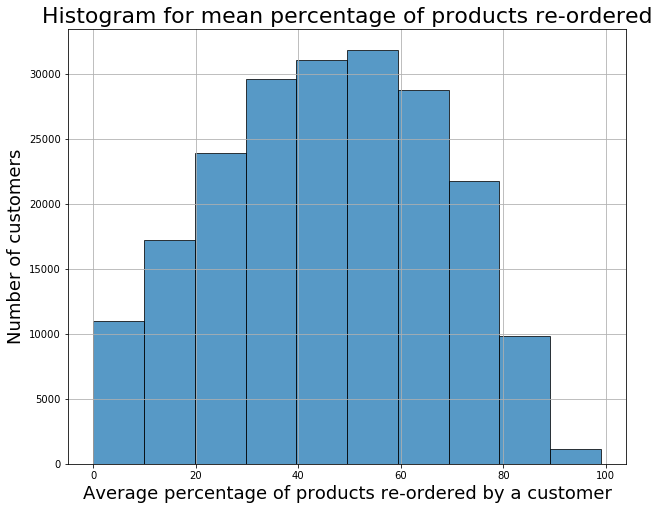

In [19]:
#code for creating a histogram of mean percentage of items re-ordered in a particular order
reordered_byUser.hist(column ='Avg_reorder', bins = 10, figsize = [10, 8], histtype = 'bar', ec = 'black', alpha= 0.75)
plt.xlabel('Average percentage of products re-ordered by a customer', fontsize = 18)
plt.ylabel('Number of customers', fontsize = 18)
plt.title('Histogram for mean percentage of products re-ordered', fontsize=22)
plt.show()

### Results
- This analysis in a form of histogram shows us that most Instacart customers repeat at least 40% percent of the items in their order. 
- It makes sense to put a re-order tab on our website and enhance user experience.

## Which department constitutes the major proportion of their purchase?

The purpose of this analysis is to identify customers who are purchasing products in a specific department and give them incentives to maximize revenue for Instacart. For example, is one customer visits 10 dairy departments and 5 other departments, that means that customer is using dairy departments the most, and about 66% of his/her time has been spent in a dairy department.

### Computational Steps
1. First, from the order data, we calculated which departments the customers visit per order. We deleted all duplicates in this stage. For example, if two vegetables were purchased in one order, we regarded it as if the customer visited the vegetable department one time in that order.

2. We grouped data by ‘user id’ level. Since we needed to figure out the number of visits by each user, we aggregated the data set.

3. We figured out which departments the customers visit the most by each customer level, the total number of visits for all departments, and the total number of visits for the specific department that the customer visits most.

4. We calculated the utilization of specific departments compared to all departments and selected customers only over 30% of utilization, since we regard those customers as frequent users for a specific department.

5. Based on pricing data, we figured out how much of the revenue has been generated from those specific customers, and what the expected revenue growth is from future strategy. (Expected growth percent is from external research, which is 15%.)
